In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 500
pd.options.display.max_rows=150

# df = pd.read_csv('/home-credit-default-risk/application_train.csv')
df = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [9]:
df.tail(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      456247       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307501               Y             3           81000.0    269550.0   
307502               Y             1           94500.0    225000.0   
307503               Y             0          112500.0    345510.0   
307504               Y             0          153000.0    331920.0   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307502      10620.0         225000.0   Unaccompanied               Working   
307503      17770.5         247500.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
307501  Secondary / secondary special               Married   
307502  Secondary / secondary special               Married   
307503               Higher education  Single / not married   
307504  Secondary / secondary special             Separated   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307501  House / apartment                    0.009175      -12961   
307502  House / apartment                    0.010966      -16063   
307503  House / apartment                    0.022800      -11870   
307504  House / apartment                    0.022625      -16705   
307505  House / apartment                    0.022800      -24384   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment                    0.005313      -11961   
307510  House / apartment                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307501          -1046            -1

Переношу sk_id_curr в индекс, т.к. это уникальный идентификатор записи

In [8]:
df = df.set_index('SK_ID_CURR')

Проверяю, что в данных нет дублирующих записей:

In [11]:
print(df.shape)
print(df.drop_duplicates().shape)

(307511, 121)
(307511, 121)


Проверка типов колонок (при чтении файла могла случиться ошибка)

In [12]:
types = pd.DataFrame(df.dtypes, columns=["column"])
types.head(150)

column
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
REGION_RATING_CLIENT_W_CITY     int64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
REG_REGION_NOT_LIVE_REGION      int64
REG_REGION_NOT_WORK_REGION      int64
LIVE_REGION_NOT_WORK_REGION     int64
REG_CITY_NOT_LIVE_CITY          int64
REG_CITY_NOT_WORK_CITY          int64
LIVE_CITY_NOT_WORK_CITY         int64
ORGANIZATION_TYPE              object
EXT_SOURCE_1                  float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
APARTMENTS_AVG                float64
BASEMENTAREA_AVG              float64
YEARS_BEGINEXPLUATATION_AVG   float64
YEARS_BUILD_AVG               float64
COMMONAREA_AVG                float64
ELEVATORS_AVG                 float64
ENTRANCES_AVG                 float64
FLOORSMAX_AVG                 float64
FLOORSMIN_AVG                 float64
LANDAREA_AVG                  float64
LIVINGAPARTMENTS_AVG          float64
LIVINGAREA_AVG                float64
NONLIVINGAPARTMENTS_AVG       float64
NONLIVINGAREA_AVG             float64
APARTMENTS_MODE               float64
BASEMENTAREA_MODE             float64
YEARS_BEGINEXPLUATATION_MODE  float64
YEARS_BUILD_MODE              float64
COMMONAREA_MODE               float64
ELEVATORS_MODE                float64
ENTRANCES_MODE                float64
FLOORSMAX_MODE                float64
FLOORSMIN_MODE                float64
LANDAREA_MODE                 float64
LIVINGAPARTMENTS_MODE         float64
LIVINGAREA_MODE               float64
NONLIVINGAPARTMENTS_MODE      float64
NONLIVINGAREA_MODE            float64
APARTMENTS_MEDI               float64
BASEMENTAREA_MEDI             float64
YEARS_BEGINEXPLUATATION_MEDI  float64
YEARS_BUILD_MEDI              float64
COMMONAREA_MEDI               float64
ELEVATORS_MEDI                float64
ENTRANCES_MEDI                float64
FLOORSMAX_MEDI                float64
FLOORSMIN_MEDI                float64
LANDAREA_MEDI                 float64
LIVINGAPARTMENTS_MEDI         float64
LIVINGAREA_MEDI               float64
NONLIVINGAPARTMENTS_MEDI      float64
NONLIVINGAREA_MEDI            float64
FONDKAPREMONT_MODE             object
HOUSETYPE_MODE                 object
TOTALAREA_MODE                float64
WALLSMATERIAL_MODE             object
EMERGENCYSTATE_MODE            object
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
FLAG_DOCUMENT_2                 int64
FLAG_DOCUMENT_3                 int64
FLAG_DOCUMENT_4                 int64
FLAG_DOCUMENT_5                 int64
FLAG_DOCUMENT_6                 int64
FLAG_DOCUMENT_7                 int64
FLAG_DOCUMENT_8                 int64
FLAG_DOCUMENT_9                 int64
FLAG_DOCUMENT_10                int64
FLAG_DOCUMENT_11                int64
FLA

Смотрим на числовые признаки:

In [6]:
df.describe().transpose().sort_values(by = 'count', ascending=False)

count           mean            std  \
TARGET                        307511.0       0.080729       0.272419   
FLAG_DOCUMENT_6               307511.0       0.088055       0.283376   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
FLAG_DOCUMENT_2               307511.0       0.000042       0.006502   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
FLAG_DOCUMENT_3               307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4               307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5               307511.0       0.015115       0.122010   
FLAG_DOCUMENT_21              307511.0       0.000335       0.018299   
FLAG_DOCUMENT_20              307511.0       0.000507       0.022518   
FLAG_DOCUMENT_19              307511.0       0.000595       0.024387   
FLAG_DOCUMENT_18              307511.0       0.008130       0.089798   
FLAG_DOCUMENT_17              307511.0       0.000267       0.016327   
FLAG_DOCUMENT_16              307511.0       0.009928       0.099144   
FLAG_DOCUMENT_15              307511.0       0.001210       0.034760   
FLAG_DOCUMENT_14              307511.0       0.002936       0.054110   
FLAG_DOCUMENT_13              307511.0       0.003525       0.059268   
FLAG_DOCUMENT_12              307511.0       0.000007       0.002550   
FLAG_DOCUMENT_11              307511.0       0.003912       0.062424   
FLAG_DOCUMENT_10              307511.0       0.000023       0.004771   
FLAG_DOCUMENT_9               307511.0       0.003896       0.062295   
FLAG_DOCUMENT_8               307511.0       0.081376       0.273412   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
FLAG_DOCUMENT_7               307511.0       0.000192       0.013850   
DAYS_LAST_PHONE_CHANGE        307510.0    -962.858788     826.808487   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
OBS_30_CNT_SOCIAL_CIRCLE      306490.0       1.422245       2.400989   
DEF_60_CNT_SOCIAL_CIRCLE      306490.0       0.100049       0.362291   
OBS_60_CNT_SOCIAL_CIRCLE      306490.0       1.405292       2.379803   
DEF_30_CNT_SOCIAL_CIRCLE      306490.0       0.143421       0.446698   
AMT_REQ_CREDIT_BUREAU_HOUR    265992.0       0.006402       0.083849   
AMT_REQ_CREDIT_BUREAU_DAY     265992.0       0.007000       0.110757   
A

Распределение таргета 

In [7]:
print(sum(df['TARGET'] == 1), '- positive class,')
print(sum(df['TARGET'] == 0), '- negative class')

baseline_accuracy = 100 * (sum(df['TARGET'] == 0) / df.shape[0])
print(baseline_accuracy, ' - доля')

24825 - positive class,
282686 - negative class
91.92711805431351  - доля


### Переходим к более детальному ознакомлению с числовыми и категориальными признаками. 

#### Числовые признаки

Выбрасываем числовые признаки с более 60% пропусков в данных:

In [8]:
len([col for col in df.columns if df[col].dtype != object and ('mode' in col or 'medi' in col or 'avg' in col.lower())])

14

In [9]:
len([col for col in df.loc[:, df.dtypes!=object].columns if df[col].nunique() == 2])

33

In [10]:
len([col for col in df.loc[:, df.dtypes!=object].columns if df[col].nunique() > 2 and df[col].nunique() < 11])

7

In [11]:
len(df.loc[:, df.dtypes!=object].columns), len(df.loc[:, df.dtypes==object].columns)

(105, 16)

In [9]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
temp_n = pd.DataFrame(df[numeric_columns].isna().sum().sort_values(ascending=False), columns=['null_count'])
temp_n['percentage'] = temp_n['null_count'] / df.shape[0] * 100
print(temp_n.shape[0])
temp_n.head(20)

105


null_count  percentage
COMMONAREA_MEDI               214865   69.872297
COMMONAREA_MODE               214865   69.872297
COMMONAREA_AVG                214865   69.872297
NONLIVINGAPARTMENTS_AVG       213514   69.432963
NONLIVINGAPARTMENTS_MEDI      213514   69.432963
NONLIVINGAPARTMENTS_MODE      213514   69.432963
LIVINGAPARTMENTS_MODE         210199   68.354953
LIVINGAPARTMENTS_MEDI         210199   68.354953
LIVINGAPARTMENTS_AVG          210199   68.354953
FLOORSMIN_MEDI                208642   67.848630
FLOORSMIN_AVG                 208642   67.848630
FLOORSMIN_MODE                208642   67.848630
YEARS_BUILD_MODE              204488   66.497784
YEARS_BUILD_AVG               204488   66.497784
YEARS_BUILD_MEDI              204488   66.497784
OWN_CAR_AGE                   202929   65.990810
LANDAREA_MEDI                 182590   59.376738
LANDAREA_MODE                 182590   59.376738
LANDAREA_AVG                  182590   59.376738
BASEMENTAREA_AVG              179943   58.515956

In [10]:
drop_columns_numeric = temp_n[temp_n['percentage'] > 60].index
print(len(drop_columns_numeric))
df = df.drop(drop_columns_numeric, axis=1)
df.head()

16


TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                                  
100002          24700.5         351000.0   Unaccompanied          Working   
100003          35698.5        1129500.0          Family    State servant   
100004           6750.0         135000.0   Unaccompanied          Working   
100006          29686.5         297000.0   Unaccompanied          Working   
100007          21865.5         513000.0   Unaccompanied          Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                              
100002      House / apartment                    0.018801       -9461   
100003      House / apartment                    0.003541      -16765   
100004      House / apartment                    0.010032      -19046   
100006      House / apartment                    0.008019      -19005   
100007      House / apartment                    0.028663      -19932   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                                                                  
100002               -637            -3648.0            -2120           1   
100003              -1188            -1186.0             -291           1   
100004               -225            -4260.0            -2531           1   
100006              -3039            -9833.0            -2437           1   
100007              -3038            -4311.0            -3458           1   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100002                   1                0                 1           1   
100003                   1                0                 1           1   
100004                   1                1                 1           1   
100006                   1                0                 1           0   
100007                   1                0                 1           0   

            FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR                                                                      
100002               0        Laborers              1.0                     2   
100003               0      Core staff              2.0                     1   
100004               0        Laborers              1.0                     2   
100006               0 

Заново пересоздаю числовые колонки, после выброса признаков с >60% пропущенных значений

В остальных числовых колонках пропуски заполняю средними значениями. (На корреляю Пирсона среднее значение на местах пропусков не должно никак повлиять, т.к. выборочное среднее у каждого признака за счет данного преобразования не меняется)

In [14]:
for col in [col for col in df.loc[:, df.dtypes!=object].columns if df[col].nunique() < 11]:
    print(col, list(df[col].unique()))

TARGET [1, 0]
FLAG_MOBIL [1, 0]
FLAG_EMP_PHONE [1, 0]
FLAG_WORK_PHONE [0, 1]
FLAG_CONT_MOBILE [1, 0]
FLAG_PHONE [1, 0]
FLAG_EMAIL [0, 1]
REGION_RATING_CLIENT [2, 1, 3]
REGION_RATING_CLIENT_W_CITY [2, 1, 3]
REG_REGION_NOT_LIVE_REGION [0, 1]
REG_REGION_NOT_WORK_REGION [0, 1]
LIVE_REGION_NOT_WORK_REGION [0, 1]
REG_CITY_NOT_LIVE_CITY [0, 1]
REG_CITY_NOT_WORK_CITY [0, 1]
LIVE_CITY_NOT_WORK_CITY [0, 1]
DEF_30_CNT_SOCIAL_CIRCLE [2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 34.0, 8.0]
DEF_60_CNT_SOCIAL_CIRCLE [2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0, 6.0]
FLAG_DOCUMENT_2 [0, 1]
FLAG_DOCUMENT_3 [1, 0]
FLAG_DOCUMENT_4 [0, 1]
FLAG_DOCUMENT_5 [0, 1]
FLAG_DOCUMENT_6 [0, 1]
FLAG_DOCUMENT_7 [0, 1]
FLAG_DOCUMENT_8 [0, 1]
FLAG_DOCUMENT_9 [0, 1]
FLAG_DOCUMENT_10 [0, 1]
FLAG_DOCUMENT_11 [0, 1]
FLAG_DOCUMENT_12 [0, 1]
FLAG_DOCUMENT_13 [0, 1]
FLAG_DOCUMENT_14 [0, 1]
FLAG_DOCUMENT_15 [0, 1]
FLAG_DOCUMENT_16 [0, 1]
FLAG_DOCUMENT_17 [0, 1]
FLAG_DOCUMENT_18 [0, 1]
FLAG_DOCUMENT_19 [0, 1]
FLAG_DOCUMENT_20 

In [11]:
not_numeric = [col for col in df.loc[:, df.dtypes!=object].columns if df[col].nunique() < 11]
df[not_numeric] = df[not_numeric].astype(object)

In [12]:
df['TARGET'] = df['TARGET'].astype(int)
len(not_numeric)

40

In [18]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0, 6.0], dtype=object)

In [13]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
print(f'Числовых признаков после удаления с большим количеством пропусков осталось: {len(numeric_columns)}')

Числовых признаков после удаления с большим количеством пропусков осталось: 50


In [18]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()
# df['DEF_60_CNT_SOCIAL_CIRCLE'].hist()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [14]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5, method='pearson'):
    au_corr = df.corr(method=method).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:n]

def get_worst_abs_correlations(df, n=5, method='pearson'):
    au_corr = df.corr(method=method).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998490
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997034
ENTRANCES_AVG                 ENTRANCES_MEDI                  0.996886
ELEVATORS_AVG                 ELEVATORS_MEDI                  0.996099
LIVINGAREA_AVG                LIVINGAREA_MEDI                 0.995596
APARTMENTS_AVG                APARTMENTS_MEDI                 0.995081
BASEMENTAREA_AVG              BASEMENTAREA_MEDI               0.994317
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993825
LANDAREA_AVG                  LANDAREA_MEDI                   0.991610
NONLIVINGAREA_AVG             NONLIVINGAREA_MEDI              0.990444
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988237
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986588
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985689
ELEVATORS_MODE                ELEVATORS_MEDI       

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
col_to_del = correlation(df[numeric_columns], 0.9)
for col in col_to_del:
    if col in df.columns:
        df = df.drop(col, axis=1)

numeric_columns = df.loc[:, df.dtypes!=object].columns
print(f'Числовых признаков после удаления с высокой корреляцией осталось: {len(numeric_columns)}')

Числовых признаков после удаления с высокой корреляцией осталось: 29


In [21]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPL

In [62]:
# df = df.drop('FLAG_EMP_PHONE', axis=1)

In [24]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
get_top_abs_correlations(df[numeric_columns], 50)

APARTMENTS_AVG              LIVINGAREA_AVG             0.888571
CNT_CHILDREN                CNT_FAM_MEMBERS            0.879160
ELEVATORS_AVG               LIVINGAREA_AVG             0.838188
APARTMENTS_AVG              ELEVATORS_AVG              0.814461
AMT_CREDIT                  AMT_ANNUITY                0.770127
ELEVATORS_AVG               FLOORSMAX_AVG              0.655983
BASEMENTAREA_AVG            LIVINGAREA_AVG             0.637269
APARTMENTS_AVG              BASEMENTAREA_AVG           0.623131
DAYS_BIRTH                  DAYS_EMPLOYED              0.615864
FLOORSMAX_AVG               LIVINGAREA_AVG             0.615218
APARTMENTS_AVG              FLOORSMAX_AVG              0.608619
ENTRANCES_AVG               LIVINGAREA_AVG             0.605302
BASEMENTAREA_AVG            ENTRANCES_AVG              0.601794
APARTMENTS_AVG              ENTRANCES_AVG              0.600283
BASEMENTAREA_AVG            ELEVATORS_AVG              0.529183
ENTRANCES_AVG               LANDAREA_AVG

<Axes: >

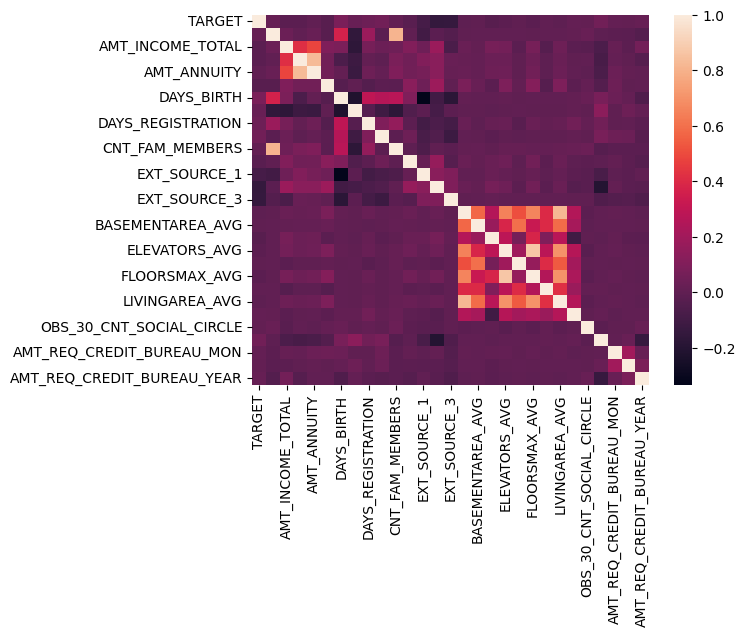

In [25]:
import seaborn as sns

sns.heatmap(df[numeric_columns].corr(method='spearman'))

In [26]:
get_top_abs_correlations(df[numeric_columns], 50, method='spearman')

ELEVATORS_AVG                FLOORSMAX_AVG                  0.867101
AMT_CREDIT                   AMT_ANNUITY                    0.830209
APARTMENTS_AVG               LIVINGAREA_AVG                 0.818657
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.811554
ELEVATORS_AVG                LIVINGAREA_AVG                 0.700604
FLOORSMAX_AVG                LIVINGAREA_AVG                 0.698029
APARTMENTS_AVG               FLOORSMAX_AVG                  0.659469
                             ELEVATORS_AVG                  0.646923
BASEMENTAREA_AVG             ENTRANCES_AVG                  0.598567
                             LIVINGAREA_AVG                 0.588245
APARTMENTS_AVG               BASEMENTAREA_AVG               0.575809
ENTRANCES_AVG                LIVINGAREA_AVG                 0.536584
APARTMENTS_AVG               ENTRANCES_AVG                  0.506323
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.481577
LANDAREA_AVG                 LIVIN

<Axes: >

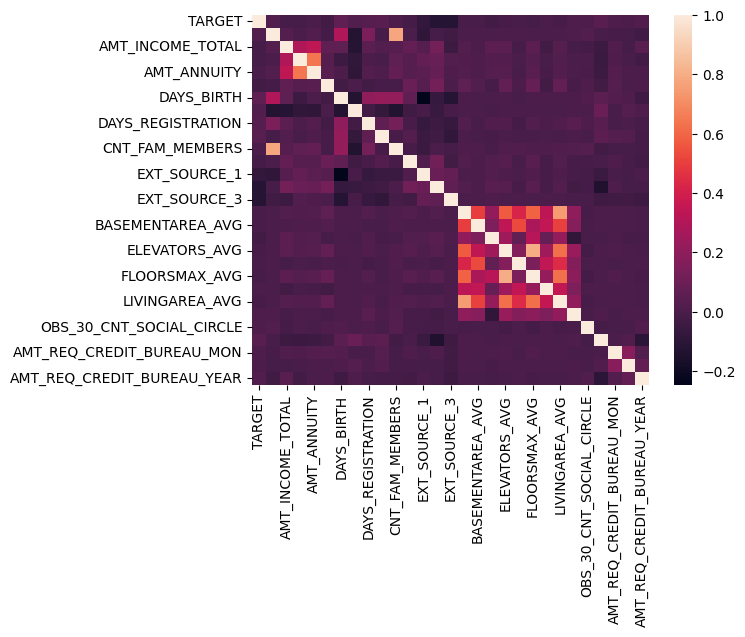

In [27]:
sns.heatmap(df[numeric_columns].corr(method='kendall')) 

In [28]:
get_top_abs_correlations(df[numeric_columns], 50, method='kendall')

ELEVATORS_AVG                FLOORSMAX_AVG                  0.796705
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.776716
APARTMENTS_AVG               LIVINGAREA_AVG                 0.749263
AMT_CREDIT                   AMT_ANNUITY                    0.641282
FLOORSMAX_AVG                LIVINGAREA_AVG                 0.624888
ELEVATORS_AVG                LIVINGAREA_AVG                 0.622126
APARTMENTS_AVG               FLOORSMAX_AVG                  0.587805
                             ELEVATORS_AVG                  0.570225
BASEMENTAREA_AVG             ENTRANCES_AVG                  0.527605
                             LIVINGAREA_AVG                 0.503129
APARTMENTS_AVG               BASEMENTAREA_AVG               0.496932
ENTRANCES_AVG                LIVINGAREA_AVG                 0.442977
APARTMENTS_AVG               ENTRANCES_AVG                  0.424583
LANDAREA_AVG                 LIVINGAREA_AVG                 0.352224
ENTRANCES_AVG                LANDA

Посмотрим, есть ли в наших числвовых признаках квазиконстантные признаки

In [29]:
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.005)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

print(len(constant_cols))
df[constant_cols].head()

6


REGION_POPULATION_RELATIVE  BASEMENTAREA_AVG  \
SK_ID_CURR                                                 
100002                        0.018801          0.036900   
100003                        0.003541          0.052900   
100004                        0.010032          0.088442   
100006                        0.008019          0.088442   
100007                        0.028663          0.088442   

            YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  LANDAREA_AVG  \
SK_ID_CURR                                                             
100002                         0.972200       0.069000      0.036900   
100003                         0.985100       0.034500      0.013000   
100004                         0.977735       0.149725      0.066333   
100006                         0.977735       0.149725      0.066333   
100007                         0.977735       0.149725      0.066333   

            NONLIVINGAREA_AVG  
SK_ID_CURR                     
100002               0.000000  
100003               0.009800  
100004               0.028358  
100006               0.028358  
100007               0.028358

In [30]:
for col in constant_cols:
    print(df[col].describe())

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
count    307511.000000
mean          0.088442
std           0.053097
min           0.000000
25%           0.086300
50%           0.088442
75%           0.088442
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64
count    307511.000000
mean          0.977735
std           0.042385
min           0.000000
25%           0.977735
50%           0.977735
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
count    307511.000000
mean          0.149725
std           0.070498
min           0.000000
25%           0.137900
50%           0.149725
75%           0.149725
max           1.000000
Name: ENTRANCES_AVG, dtype: float64
count    307511.000000
mean          0.066333
std           0.051743
min           0.00000

In [31]:
cutter = VarianceThreshold(threshold=0.001)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

print(len(constant_cols))
df[constant_cols].head()

1


REGION_POPULATION_RELATIVE
SK_ID_CURR                            
100002                        0.018801
100003                        0.003541
100004                        0.010032
100006                        0.008019
100007                        0.028663

In [32]:
# признаки, которые стоит поизучать
for _ in constant_cols:
    if 'FLAG' not in _:
        print(_)

REGION_POPULATION_RELATIVE


Из 67 признаков, у 43 выборочная дисперсия меньше 0.1. Почему так могло произойти? Среди наших числовых признаках могли оказаться бинарные признаки и признаки, которые сами по себе имеют очень маленькие значения.

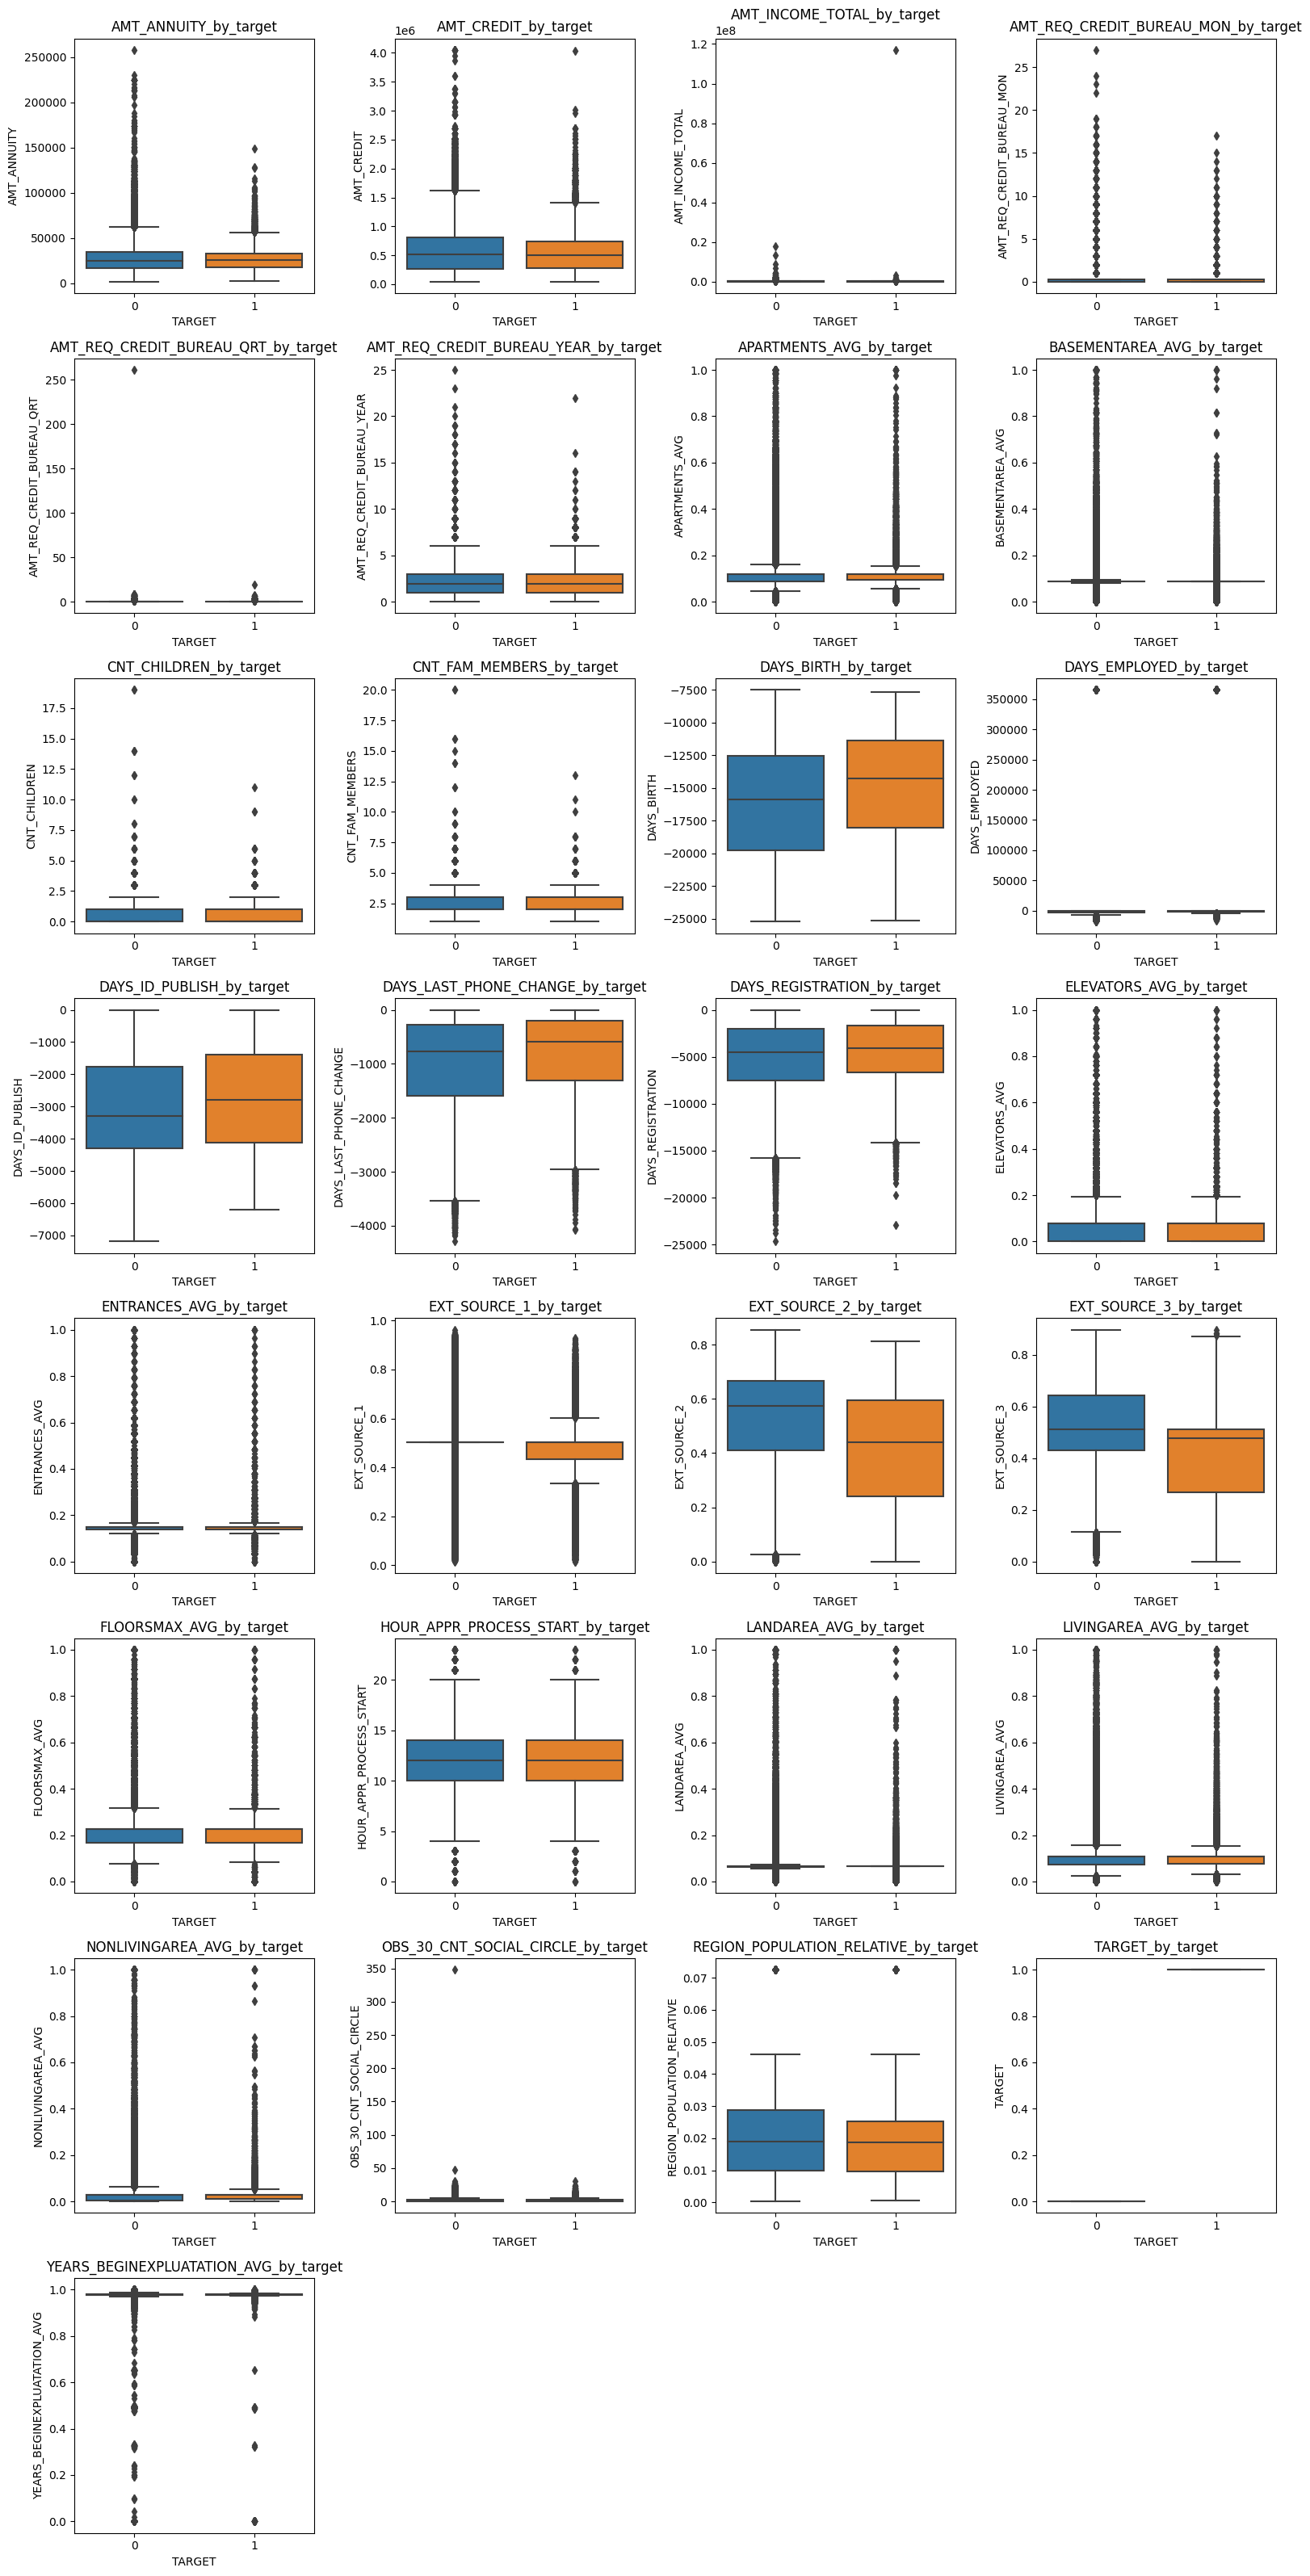

In [33]:
import seaborn as sns

numeric_columns = sorted(df.loc[:, df.dtypes!=object].columns)

num_rows = (len(numeric_columns) + 3) // 4  # округление вверх
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))

for i, col in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]  # Определение позиции на сетке графиков
    sns.boxplot(x=df['TARGET'].astype('category'), y=col, data=df, ax=ax)
    ax.set_title(col + '_by_target')

for j in range(i + 1, num_rows * num_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

In [22]:
# numeric_columns

# выкинули бинарные в категориальные признаки
new_numeric_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'DAYS_BIRTH',
                      'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 
                       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'LANDAREA_AVG', 'NONLIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE',
                       'TARGET', 'YEARS_BEGINEXPLUATATION_AVG']

Выберем признаки на глаз - проверим, что не выбрали ничего лишнего

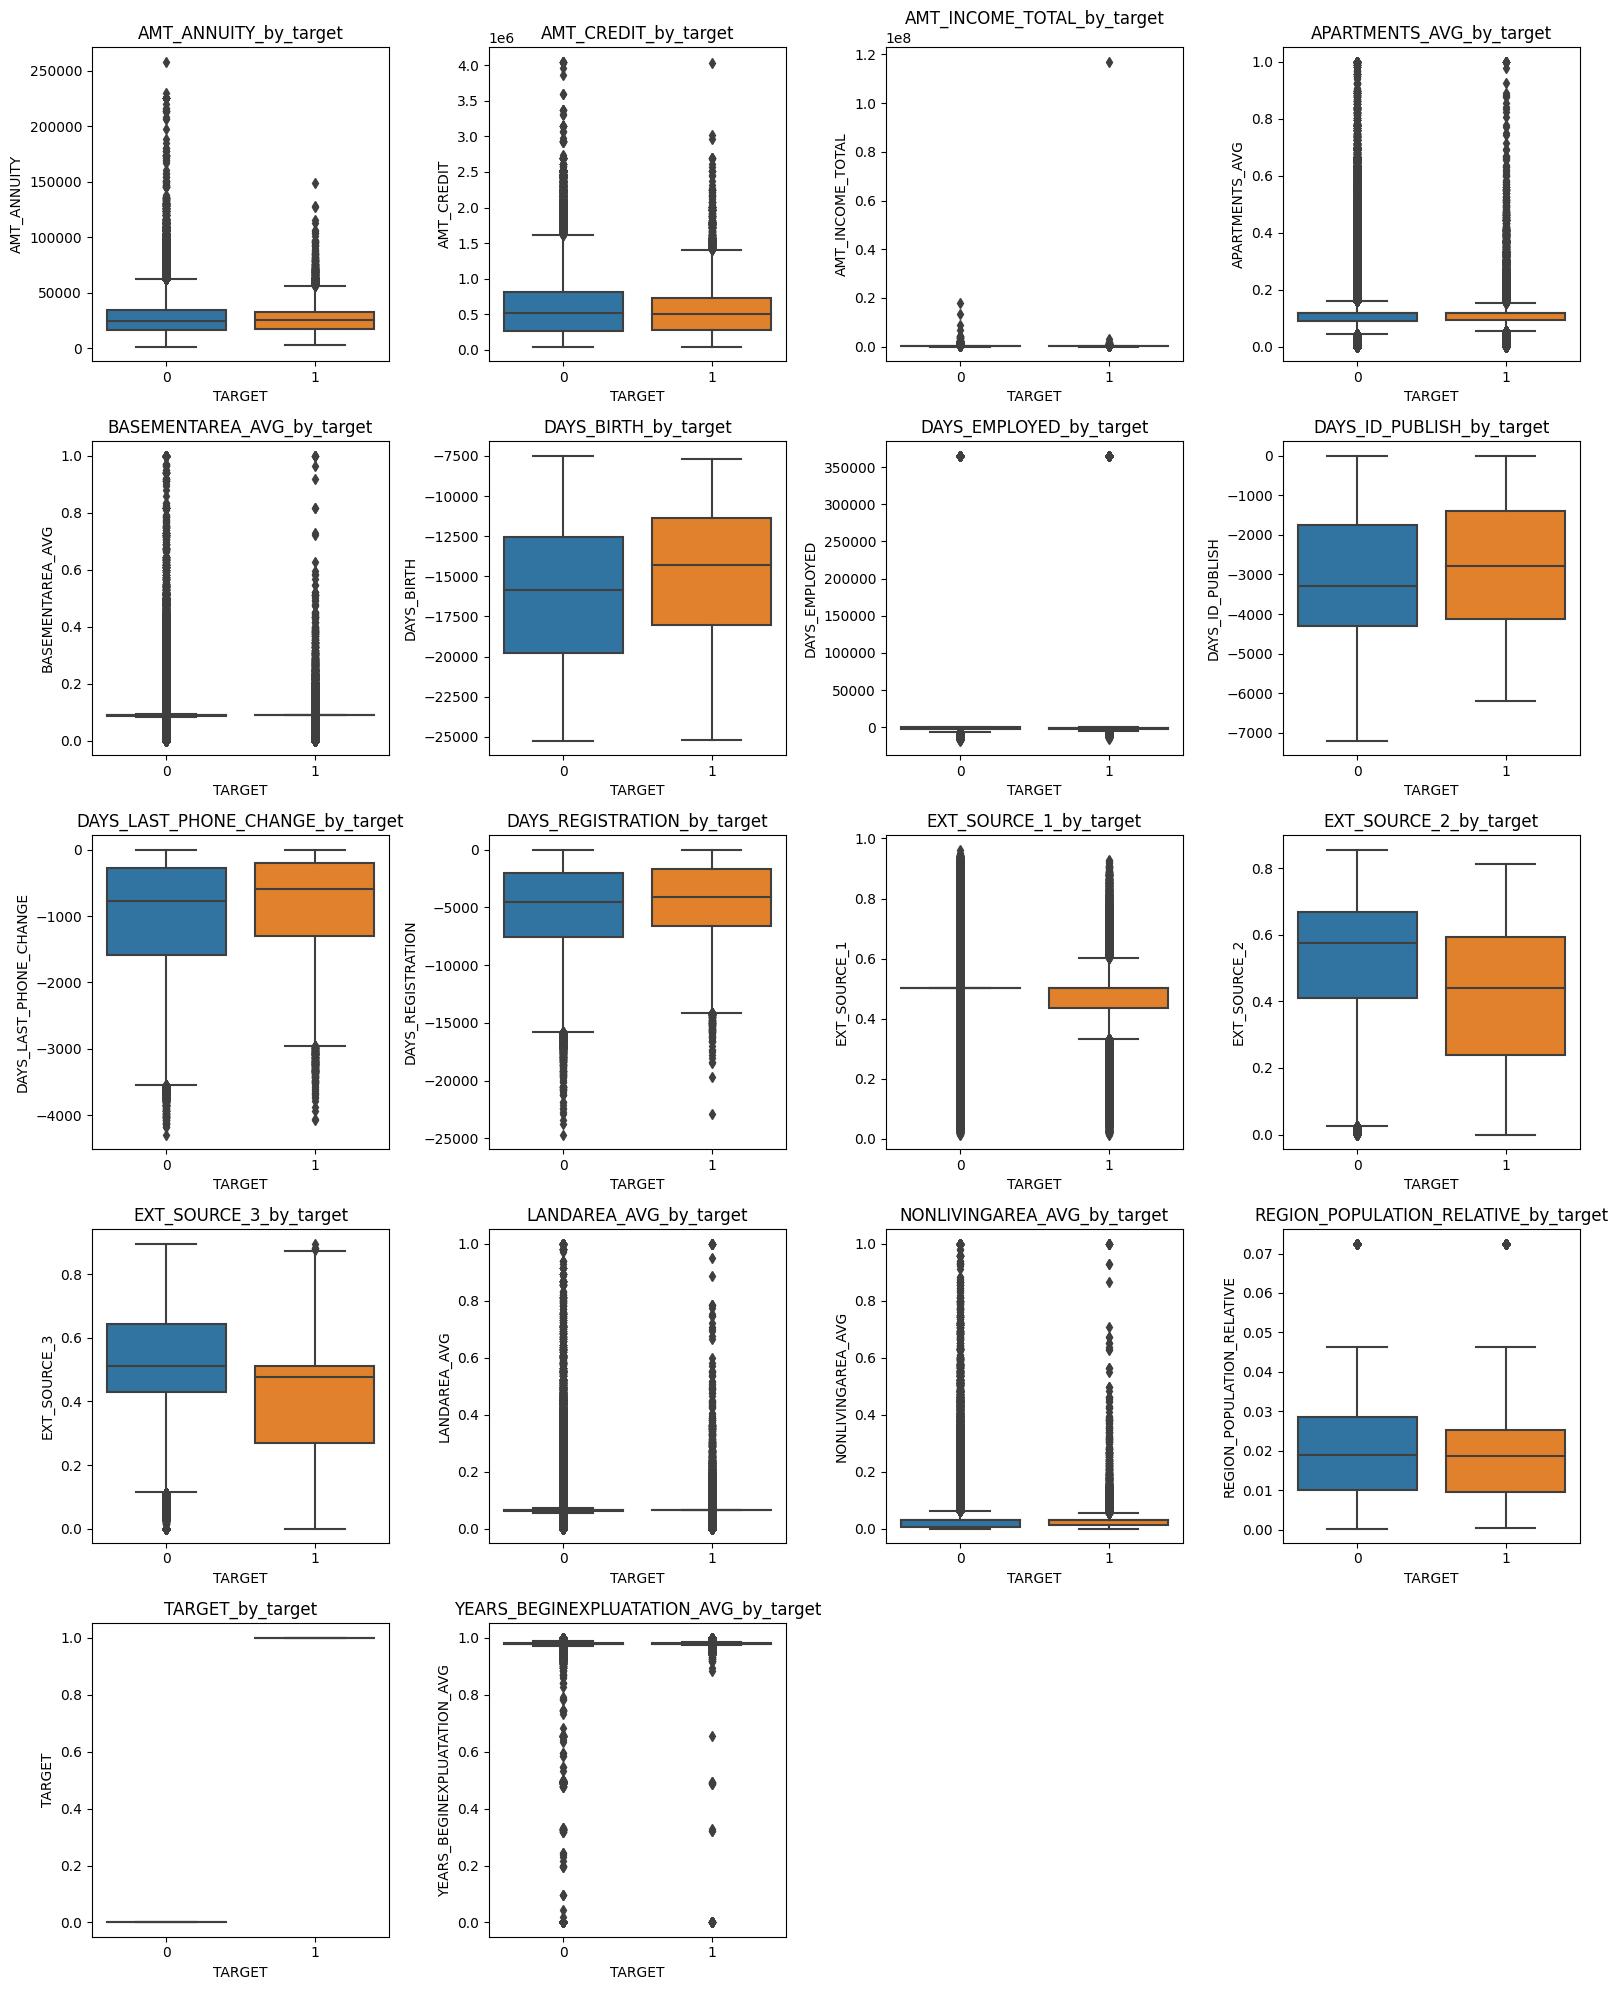

In [39]:
# new_numeric_columns = ['YEARS_BEGINEXPLUATATION_AVG', 'REG_CITY_NOT_WORK_CITY', 'LIVINGAREA_AVG', 
#                        'NONLIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 
#                        'FLOORSMAX_AVG', 'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'FLAG_PHONE', 
#                        'FLAG_DOCUMENT_3', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 
#                        'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
#                        'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 
#                        'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_ANNUITY', 'AMT_CREDIT']
# старый выбор

num_rows = (len(new_numeric_columns) + 3) // 4  # округление вверх
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))

for i, col in enumerate(new_numeric_columns):
    ax = axes[i // num_cols, i % num_cols]  # Определение позиции на сетке графиков
    sns.boxplot(x=df['TARGET'].astype('category'), y=col, data=df, ax=ax)
    ax.set_title(col + '_by_target')

for j in range(i + 1, num_rows * num_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

In [23]:
if 'TARGET' not in new_numeric_columns:
    new_numeric_columns.append('TARGET')

df_new_numeric_columns = df[new_numeric_columns]

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

pivot_table = df_new_numeric_columns.pivot_table(index='TARGET', values=new_numeric_columns,
                               aggfunc=['mean', 'std', 'min', 'max', 'median', q25, q75])

pivot_table.stack(level=[0]).reset_index().sort_values(by='level_1')

TARGET level_1    AMT_ANNUITY    AMT_CREDIT  AMT_INCOME_TOTAL  \
0        0     max  258025.500000  4.050000e+06      1.800009e+07   
7        1     max  149211.000000  4.027680e+06      1.170000e+08   
1        0    mean   27163.621012  6.026483e+05      1.690777e+05   
8        1    mean   26481.744290  5.577785e+05      1.656118e+05   
2        0  median   24876.000000  5.177880e+05      1.485000e+05   
9        1  median   25263.000000  4.975200e+05      1.350000e+05   
3        0     min    1615.500000  4.500000e+04      2.565000e+04   
10       1     min    2722.500000  4.500000e+04      2.565000e+04   
4        0     q25   16456.500000  2.700000e+05      1.125000e+05   
11       1     q25   17361.000000  2.844000e+05      1.125000e+05   
5        0     q75   34749.000000  8.100000e+05      2.025000e+05   
12       1     q75   32976.000000  7.333155e+05      2.025000e+05   
6        0     std   14657.996056  4.068459e+05      1.104763e+05   
13       1     std   12450.676999  3.464332e+05      7.466770e+05   

    APARTMENTS_AVG  BASEMENTAREA_AVG    DAYS_BIRTH  DAYS_EMPLOYED  \
0         1.000000          1.000000  -7489.000000  365243.000000   
7         1.000000          1.000000  -7678.000000  365243.000000   
1         0.117876          0.088657 -16138.176397   65696.146123   
8         0.112484          0.086002 -14884.828077   42394.675448   
2         0.117440          0.088442 -15877.000000   -1235.000000   
9         0.117440          0.088442 -14282.000000   -1034.000000   
3         0.000000          0.000000 -25229.000000  -17912.000000   
10        0.000000          0.000000 -25168.000000  -16069.000000   
4         0.088700          0.085600 -19793.750000   -2813.000000   
11        0.092800          0.088442 -18037.000000   -2156.000000   
5         0.117440          0.088442 -12536.000000    -278.000000   
12        0.117440          0.088442 -11396.000000    -379.000000   
6         0.076757          0.053794   4364.200856  142877.810161   
13        0.066035          0.044319   4192.844583  119484.634253   

    DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  EXT_SOURCE_1  \
0          0.000000                0.000000           0.000000      0.962693   
7          0.000000                0.000000           0.000000      0.929394   
1      -3017.219788             -976.388247       -5029.941065      0.506226   
8      -2732.099617             -808.796818       -4487.127009      0.455490   
2      -3295.000000             -776.000000       -4544.000000      0.502130   
9      -2797.000000             -594.000000       -4056.000000      0.502130   
3      -7197.000000            -4292.000000      -24672.000000      0.014568   
10     -6207.000000            -4070.000000      -22928.000000      0.014691   
4      -4313.000000            -1586.000000       -7550.000000      0.502130   
11     -4119.000000            -1301.000000       -6646.000000      0.434735   
5      -1755.000000             -281.000000       -2045.000000      0.502130   
12     -1392.000000             -194.000000       -1671.000000      0.502130   
6       1506.614090              831.209269        3538.464478      0.138414   
13      1516.975313              758.090713        3299.650241      0.142021   

    EXT_SOURCE_2  EXT_SOURCE_3  LANDAREA_AVG  NONLIVINGAREA_AVG  \
0   8.549997e-01      0.893976      1.000000           1.000000   
7   8.118697e-01      0.896010      1.000000           1.000000   
1   5.234591e-01      0.518990      0.066433           0.028474   
8   4.111516e-01      0.418189      0.065200           0.027030   
2   5.734019e-01      0.510853      0.066333           0.028358   
9   4.410759e-01      0.475850      0.066333           0.028358   
3   8.173617e-08      0.000527      0.000000           0.000000   
10  5.002109e-06      0.000527      0.000000           0.000000   
4   4.103394e-01      0.431192      0.062200           0.005700   
11  2.390844e-01      0.269286      0.066333           0.0121

In [56]:
# new_numeric_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 
#                        'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',   'EXT_SOURCE_1', 
#                        'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'HOUR_APPR_PROCESS_START', 
#                        'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE', 
#                        'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG', 'TARGET']

#### Переходим к категориальным признакам. 

In [16]:
object_columns = df.loc[:, df.dtypes==object].columns
temp_o = pd.DataFrame(df[object_columns].isna().sum().sort_values(ascending=False), columns=['null_count'])
temp_o['percentage'] = temp_o['null_count'] / df.shape[0]
print(temp_o.shape[0])
temp_o.head(20)

55


null_count  percentage
FONDKAPREMONT_MODE              210295    0.683862
WALLSMATERIAL_MODE              156341    0.508408
HOUSETYPE_MODE                  154297    0.501761
EMERGENCYSTATE_MODE             145755    0.473983
OCCUPATION_TYPE                  96391    0.313455
AMT_REQ_CREDIT_BUREAU_DAY        41519    0.135016
AMT_REQ_CREDIT_BUREAU_HOUR       41519    0.135016
AMT_REQ_CREDIT_BUREAU_WEEK       41519    0.135016
NAME_TYPE_SUITE                   1292    0.004201
DEF_60_CNT_SOCIAL_CIRCLE          1021    0.003320
DEF_30_CNT_SOCIAL_CIRCLE          1021    0.003320
FLAG_DOCUMENT_3                      0    0.000000
FLAG_DOCUMENT_5                      0    0.000000
FLAG_DOCUMENT_6                      0    0.000000
FLAG_DOCUMENT_7                      0    0.000000
FLAG_DOCUMENT_8                      0    0.000000
FLAG_DOCUMENT_9                      0    0.000000
FLAG_DOCUMENT_10                     0    0.000000
FLAG_DOCUMENT_11                     0    0.000000
FLAG_DOCUMENT_12                     0    0.000000

In [42]:
len(object_columns)

55

In [17]:
null_object_cols = temp_o[temp_o['null_count'] > 0].index
for col in null_object_cols:
    df[col] = df[col].fillna('NEW')

In [44]:
df.describe(include=object)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           307511           307511                         307511   
unique               8                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_EMP_PHONE  \
count              307511             307511      307511          307511   
unique                  6                  6           2               2   
top               Married  House / apartment           1               1   
freq               196432             272868      307510          252125   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
count            307511            307511      307511      307511   
unique                2                 2           2           2   
top                   0                 1           0           0   
freq             246203            306937      221080      290069   

       OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count           307511                307511                       307511   
unique              19                     3                            3   
top                NEW                     2                            2   
freq             96391                226984                       229484   

       WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count                      307511                      307511   
unique                          7                           2   
top                       TUESDAY                           0   
freq                        53901                      302854   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                       307511                       307511   
unique                           2                            2   
top                              0                            0   
freq                        291899                       295008   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count                   307511                  307511   
unique                       2                       2   
top                          0                       0   
freq                    283472                  236644   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                    307511                  307511             307511   
unique                        2                      58                  5   
top                           0  Business Entity Type 3                NEW   
freq                     252296                   67992             210295   

       HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
count          307511             307511              307511   
unique              4                  8                   3   
top               NEW                NEW                  No   
freq           154297             156341              159428   

        DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
count                   307511.0                  307511.0           307511   
unique                      11.0                      10.0                2   
top                          0.0                       0.0                0   
freq                    271324.0                  280721.0           307498   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
count            307511          

In [18]:
drop_columns_object = temp_o[temp_o['percentage'] > 60].index
df = df.drop(drop_columns_object, axis=1)
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   

            AMT_ANNUITY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                 
100002          24700.5   Unaccompanied          Working   
100003          35698.5          Family    State servant   
100004           6750.0   Unaccompanied          Working   
100006          29686.5   Unaccompanied          Working   
100007          21865.5   Unaccompanied          Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                              
100002      House / apartment                    0.018801       -9461   
100003      House / apartment                    0.003541      -16765   
100004      House / apartment                    0.010032      -19046   
100006      House / apartment                    0.008019      -19005   
100007      House / apartment                    0.028663      -19932   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL  \
SK_ID_CURR                                                                 
100002               -637            -3648.0            -2120          1   
100003              -1188            -1186.0             -291          1   
100004               -225            -4260.0            -2531          1   
100006              -3039            -9833.0            -2437          1   
100007              -3038            -4311.0            -3458          1   

           FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE  \
SK_ID_CURR                                                              
100002                  1               0                1          1   
100003                  1               0                1          1   
100004                  1               1                1          1   
100006                  1               0                1          0   
100007                  1               0                1          0   

           FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
SK_ID_CURR                                                                    
100002              0        Laborers              1.0                    2   
100003              0      Core staff              2.0                    1   
100004              0        Laborers              1.0                    2   
100006              0        Laborers              2.0                    2   
100007              0      Core staff              1.0                    2   

           REGION_RATING_CLI

In [19]:
print(f'При OHE дополнительно появится: {df[object_columns].nunique().sum() - len(df[object_columns].nunique())} признака')
df[object_columns].nunique().sort_values(ascending=False)

При OHE дополнительно появится: 208 признака


ORGANIZATION_TYPE              58
OCCUPATION_TYPE                19
DEF_30_CNT_SOCIAL_CIRCLE       11
AMT_REQ_CREDIT_BUREAU_WEEK     10
AMT_REQ_CREDIT_BUREAU_DAY      10
DEF_60_CNT_SOCIAL_CIRCLE       10
NAME_TYPE_SUITE                 8
NAME_INCOME_TYPE                8
WALLSMATERIAL_MODE              8
WEEKDAY_APPR_PROCESS_START      7
AMT_REQ_CREDIT_BUREAU_HOUR      6
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
NAME_EDUCATION_TYPE             5
FONDKAPREMONT_MODE              5
HOUSETYPE_MODE                  4
REGION_RATING_CLIENT            3
CODE_GENDER                     3
REGION_RATING_CLIENT_W_CITY     3
EMERGENCYSTATE_MODE             3
FLAG_DOCUMENT_9                 2
FLAG_DOCUMENT_10                2
FLAG_DOCUMENT_11                2
FLAG_DOCUMENT_12                2
FLAG_DOCUMENT_13                2
FLAG_DOCUMENT_14                2
FLAG_DOCUMENT_15                2
FLAG_DOCUMENT_7                 2
FLAG_DOCUMENT_16                2
FLAG_DOCUMENT_

In [47]:
for col in object_columns:
    count_data = df.groupby([col, 'TARGET']).size().unstack(fill_value=0)
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0)
    #     percentage_data = 
    display(percentage_data.stack().reset_index(name='Percentage'))
    

NAME_CONTRACT_TYPE  TARGET  Percentage
0         Cash loans       0    0.916541
1         Cash loans       1    0.083459
2    Revolving loans       0    0.945217
3    Revolving loans       1    0.054783

CODE_GENDER  TARGET  Percentage
0           F       0    0.930007
1           F       1    0.069993
2           M       0    0.898581
3           M       1    0.101419
4         XNA       0    1.000000
5         XNA       1    0.000000

FLAG_OWN_CAR  TARGET  Percentage
0            N       0    0.914998
1            N       1    0.085002
2            Y       0    0.927563
3            Y       1    0.072437

FLAG_OWN_REALTY  TARGET  Percentage
0               N       0    0.916751
1               N       1    0.083249
2               Y       0    0.920384
3               Y       1    0.079616

NAME_TYPE_SUITE  TARGET  Percentage
0          Children       0    0.926232
1          Children       1    0.073768
2            Family       0    0.925054
3            Family       1    0.074946
4   Group of people       0    0.915129
5   Group of people       1    0.084871
6               NEW       0    0.945820
7               NEW       1    0.054180
8           Other_A       0    0.912240
9           Other_A       1    0.087760
10          Other_B       0    0.901695
11          Other_B       1    0.098305
12  Spouse, partner       0    0.921284
13  Spouse, partner       1    0.078716
14    Unaccompanied       0    0.918170
15    Unaccompanied       1    0.081830

NAME_INCOME_TYPE  TARGET  Percentage
0            Businessman       0    1.000000
1            Businessman       1    0.000000
2   Commercial associate       0    0.925157
3   Commercial associate       1    0.074843
4        Maternity leave       0    0.600000
5        Maternity leave       1    0.400000
6              Pensioner       0    0.946136
7              Pensioner       1    0.053864
8          State servant       0    0.942450
9          State servant       1    0.057550
10               Student       0    1.000000
11               Student       1    0.000000
12            Unemployed       0    0.636364
13            Unemployed       1    0.363636
14               Working       0    0.904115
15               Working       1    0.095885

NAME_EDUCATION_TYPE  TARGET  Percentage
0                Academic degree       0    0.981707
1                Academic degree       1    0.018293
2               Higher education       0    0.946449
3               Higher education       1    0.053551
4              Incomplete higher       0    0.915150
5              Incomplete higher       1    0.084850
6                Lower secondary       0    0.890723
7                Lower secondary       1    0.109277
8  Secondary / secondary special       0    0.910601
9  Secondary / secondary special       1    0.089399

NAME_FAMILY_STATUS  TARGET  Percentage
0         Civil marriage       0    0.900554
1         Civil marriage       1    0.099446
2                Married       0    0.924401
3                Married       1    0.075599
4              Separated       0    0.918058
5              Separated       1    0.081942
6   Single / not married       0    0.901923
7   Single / not married       1    0.098077
8                Unknown       0    1.000000
9                Unknown       1    0.000000
10                 Widow       0    0.941758
11                 Widow       1    0.058242

NAME_HOUSING_TYPE  TARGET  Percentage
0       Co-op apartment       0    0.920677
1       Co-op apartment       1    0.079323
2     House / apartment       0    0.922043
3     House / apartment       1    0.077957
4   Municipal apartment       0    0.914603
5   Municipal apartment       1    0.085397
6      Office apartment       0    0.934276
7      Office apartment       1    0.065724
8      Rented apartment       0    0.876869
9      Rented apartment       1    0.123131
10         With parents       0    0.883019
11         With parents       1    0.116981

FLAG_MOBIL  TARGET  Percentage
0           0       0    1.000000
1           0       1    0.000000
2           1       0    0.919271
3           1       1    0.080729

FLAG_EMP_PHONE  TARGET  Percentage
0               0       0    0.945997
1               0       1    0.054003
2               1       0    0.913400
3               1       1    0.086600

FLAG_WORK_PHONE  TARGET  Percentage
0                0       0    0.923149
1                0       1    0.076851
2                1       0    0.903699
3                1       1    0.096301

FLAG_CONT_MOBILE  TARGET  Percentage
0                 0       0    0.921603
1                 0       1    0.078397
2                 1       0    0.919267
3                 1       1    0.080733

FLAG_PHONE  TARGET  Percentage
0           0       0    0.915216
1           0       1    0.084784
2           1       0    0.929643
3           1       1    0.070357

FLAG_EMAIL  TARGET  Percentage
0           0       0    0.919154
1           0       1    0.080846
2           1       0    0.921225
3           1       1    0.078775

OCCUPATION_TYPE  TARGET  Percentage
0             Accountants       0    0.951697
1             Accountants       1    0.048303
2          Cleaning staff       0    0.903933
3          Cleaning staff       1    0.096067
4           Cooking staff       0    0.895560
5           Cooking staff       1    0.104440
6              Core staff       0    0.936960
7              Core staff       1    0.063040
8                 Drivers       0    0.886739
9                 Drivers       1    0.113261
10               HR staff       0    0.936057
11               HR staff       1    0.063943
12  High skill tech staff       0    0.938401
13  High skill tech staff       1    0.061599
14               IT staff       0    0.935361
15               IT staff       1    0.064639
16               Laborers       0    0.894212
17               Laborers       1    0.105788
18     Low-skill Laborers       0    0.828476
19     Low-skill Laborers       1    0.171524
20               Managers       0    0.937860
21               Managers       1    0.062140
22         Medicine staff       0    0.932998
23         Medicine staff       1    0.067002
24                    NEW       0    0.934869
25                    NEW       1    0.065131
26  Private service staff       0    0.934012
27  Private service staff       1    0.065988
28          Realty agents       0    0.921438
29          Realty agents       1    0.078562
30            Sales staff       0    0.903682
31            Sales staff       1    0.096318
32            Secretaries       0    0.929502
33            Secretaries       1    0.070498
34         Security staff       0    0.892576
35         Security staff       1    0.107424
36   Waiters/barmen staff       0    0.887240
37   Waiters/barmen staff       1    0.112760

REGION_RATING_CLIENT  TARGET  Percentage
0                     1       0    0.951797
1                     1       1    0.048203
2                     2       0    0.921109
3                     2       1    0.078891
4                     3       0    0.888972
5                     3       1    0.111028

REGION_RATING_CLIENT_W_CITY  TARGET  Percentage
0                            1       0    0.951591
1                            1       1    0.048409
2                            2       0    0.920822
3                            2       1    0.079178
4                            3       0    0.885978
5                            3       1    0.114022

WEEKDAY_APPR_PROCESS_START  TARGET  Percentage
0                      FRIDAY       0    0.918531
1                      FRIDAY       1    0.081469
2                      MONDAY       0    0.922428
3                      MONDAY       1    0.077572
4                    SATURDAY       0    0.921127
5                    SATURDAY       1    0.078873
6                      SUNDAY       0    0.920709
7                      SUNDAY       1    0.079291
8                    THURSDAY       0    0.918997
9                    THURSDAY       1    0.081003
10                    TUESDAY       0    0.916495
11                    TUESDAY       1    0.083505
12                  WEDNESDAY       0    0.918396
13                  WEDNESDAY       1    0.081604

REG_REGION_NOT_LIVE_REGION  TARGET  Percentage
0                           0       0    0.919460
1                           0       1    0.080540
2                           1       0    0.907022
3                           1       1    0.092978

REG_REGION_NOT_WORK_REGION  TARGET  Percentage
0                           0       0    0.919709
1                           0       1    0.080291
2                           1       0    0.911094
3                           1       1    0.088906

LIVE_REGION_NOT_WORK_REGION  TARGET  Percentage
0                            0       0    0.919429
1                            0       1    0.080571
2                            1       0    0.915540
3                            1       1    0.084460

REG_CITY_NOT_LIVE_CITY  TARGET  Percentage
0                       0       0    0.922793
1                       0       1    0.077207
2                       1       0    0.877740
3                       1       1    0.122260

REG_CITY_NOT_WORK_CITY  TARGET  Percentage
0                       0       0    0.926873
1                       0       1    0.073127
2                       1       0    0.893886
3                       1       1    0.106114

LIVE_CITY_NOT_WORK_CITY  TARGET  Percentage
0                        0       0    0.923415
1                        0       1    0.076585
2                        1       0    0.900335
3                        1       1    0.099665

ORGANIZATION_TYPE  TARGET  Percentage
0               Advertising       0    0.918415
1               Advertising       1    0.081585
2               Agriculture       0    0.895273
3               Agriculture       1    0.104727
4                      Bank       0    0.948145
5                      Bank       1    0.051855
6    Business Entity Type 1       0    0.918616
7    Business Entity Type 1       1    0.081384
8    Business Entity Type 2       0    0.914716
9    Business Entity Type 2       1    0.085284
10   Business Entity Type 3       0    0.907004
11   Business Entity Type 3       1    0.092996
12                 Cleaning       0    0.888462
13                 Cleaning       1    0.111538
14             Construction       0    0.883202
15             Construction       1    0.116798
16                  Culture       0    0.944591
17                  Culture       1    0.055409
18              Electricity       0    0.933684
19              Electricity       1    0.066316
20                Emergency       0    0.928571
21                Emergency       1    0.071429
22               Government       0    0.930219
23               Government       1    0.069781
24                    Hotel       0    0.935818
25                    Hotel       1    0.064182
26                  Housing       0    0.920554
27                  Housing       1    0.079446
28         Industry: type 1       0    0.889317
29         Industry: type 1       1    0.110683
30        Industry: type 10       0    0.935780
31        Industry: type 10       1    0.064220
32        Industry: type 11       0    0.913462
33        Industry: type 11       1    0.086538
34        Industry: type 12       0    0.962060
35        Industry: type 12       1    0.037940
36        Industry: type 13       0    0.865672
37        Industry: type 13       1    0.134328
38         Industry: type 2       0    0.927948
39         Industry: type 2       1    0.072052
40         Industry: type 3       0    0.893838
41         Industry: type 3       1    0.106162
42         Industry: type 4       0    0.898518
43         Industry: type 4       1    0.101482
44         Industry: type 5       0    0.931553
45         Industry: type 5       1    0.068447
46         Industry: type 6       0    0.928571
47         Industry: type 6       1    0.071429
48         Industry: type 7       0    0.919663
49         Industry: type 7       1    0.080337
50         Industry: type 8       0    0.875000
51         Industry: type 8       1    0.125000
52         Industry: type 9       0    0.933195
53         Industry: type 9       1    0.066805
54                Insurance       0    0.943049
55                Insurance       1    0.056951
56             Kindergarten       0    0.929651
57             Kindergarten       1    0.070349
58           Legal Services       0    0.921311
59           Legal Services       1    0.078689
60                 Medicine       0    0.934155
61                 Medicine       1    0.065845
62                 Military       0    0.948747
63                 Military       1    0.051253
64                   Mobile       0    0.908517
65                   Mobile       1    0.091483
66                    Other       0    0.923575
67                    Other       1    0.076425
68                   Police       0    0.950021
69                   Police       1    0.049979
70                   Postal       0    0.915624
71                   Postal       1    0.084376
72                  Realtor       0    0.893939
73                  Realtor       1    0.106061
74                 Religion       0    0.941176
75                 Religion       1    0.058824
76               Restaurant       0    0.882938
77               Restaurant       1    0.117062
78                   School       0    0.940852
79                   School       1    0.059148
80                 Security       0    0.900216
81                 Security       1    0.099784
82      Security Ministrie

FONDKAPREMONT_MODE  TARGET  Percentage
0                    NEW       0    0.913812
1                    NEW       1    0.086188
2          not specified       0    0.924565
3          not specified       1    0.075435
4       org spec account       0    0.941805
5       org spec account       1    0.058195
6       reg oper account       0    0.930218
7       reg oper account       1    0.069782
8  reg oper spec account       0    0.934437
9  reg oper spec account       1    0.065563

HOUSETYPE_MODE  TARGET  Percentage
0               NEW       0    0.908488
1               NEW       1    0.091512
2    block of flats       0    0.930566
3    block of flats       1    0.069434
4  specific housing       0    0.898599
5  specific housing       1    0.101401
6    terraced house       0    0.915017
7    terraced house       1    0.084983

WALLSMATERIAL_MODE  TARGET  Percentage
0               Block       0    0.929753
1               Block       1    0.070247
2               Mixed       0    0.924652
3               Mixed       1    0.075348
4          Monolithic       0    0.952782
5          Monolithic       1    0.047218
6                 NEW       0    0.908719
7                 NEW       1    0.091281
8              Others       0    0.916923
9              Others       1    0.083077
10              Panel       0    0.936523
11              Panel       1    0.063477
12       Stone, brick       0    0.925943
13       Stone, brick       1    0.074057
14             Wooden       0    0.903021
15             Wooden       1    0.096979

EMERGENCYSTATE_MODE  TARGET  Percentage
0                 NEW       0    0.907393
1                 NEW       1    0.092607
2                  No       0    0.930351
3                  No       1    0.069649
4                 Yes       0    0.904210
5                 Yes       1    0.095790

DEF_30_CNT_SOCIAL_CIRCLE  TARGET  Percentage
0                       0.0       0    0.922241
1                       0.0       1    0.077759
2                       1.0       0    0.898546
3                       1.0       1    0.101454
4                       2.0       0    0.883524
5                       2.0       1    0.116476
6                       3.0       0    0.871644
7                       3.0       1    0.128356
8                       4.0       0    0.861660
9                       4.0       1    0.138340
10                      5.0       0    0.857143
11                      5.0       1    0.142857
12                      6.0       0    0.909091
13                      6.0       1    0.090909
14                      7.0       0    1.000000
15                      7.0       1    0.000000
16                      8.0       0    1.000000
17                      8.0       1    0.000000
18                     34.0       0    1.000000
19                     34.0       1    0.000000
20                      NEW       0    0.964740
21                      NEW       1    0.035260

DEF_60_CNT_SOCIAL_CIRCLE  TARGET  Percentage
0                       0.0       0    0.921652
1                       0.0       1    0.078348
2                       1.0       0    0.894831
3                       1.0       1    0.105169
4                       2.0       0    0.878549
5                       2.0       1    0.121451
6                       3.0       0    0.841137
7                       3.0       1    0.158863
8                       4.0       0    0.888889
9                       4.0       1    0.111111
10                      5.0       0    0.850000
11                      5.0       1    0.150000
12                      6.0       0    1.000000
13                      6.0       1    0.000000
14                      7.0       0    1.000000
15                      7.0       1    0.000000
16                     24.0       0    1.000000
17                     24.0       1    0.000000
18                      NEW       0    0.964740
19                      NEW       1    0.035260

FLAG_DOCUMENT_2  TARGET  Percentage
0                0       0    0.919281
1                0       1    0.080719
2                1       0    0.692308
3                1       1    0.307692

FLAG_DOCUMENT_3  TARGET  Percentage
0                0       0    0.938175
1                0       1    0.061825
2                1       0    0.911551
3                1       1    0.088449

FLAG_DOCUMENT_4  TARGET  Percentage
0                0       0    0.919265
1                0       1    0.080735
2                1       0    1.000000
3                1       1    0.000000

FLAG_DOCUMENT_5  TARGET  Percentage
0                0       0    0.919261
1                0       1    0.080739
2                1       0    0.919966
3                1       1    0.080034

FLAG_DOCUMENT_6  TARGET  Percentage
0                0       0    0.916850
1                0       1    0.083150
2                1       0    0.944346
3                1       1    0.055654

FLAG_DOCUMENT_7  TARGET  Percentage
0                0       0    0.919265
1                0       1    0.080735
2                1       0    0.949153
3                1       1    0.050847

FLAG_DOCUMENT_8  TARGET  Percentage
0                0       0    0.918619
1                0       1    0.081381
2                1       0    0.926630
3                1       1    0.073370

FLAG_DOCUMENT_9  TARGET  Percentage
0                0       0    0.919197
1                0       1    0.080803
2                1       0    0.938230
3                1       1    0.061770

FLAG_DOCUMENT_10  TARGET  Percentage
0                 0       0    0.919269
1                 0       1    0.080731
2                 1       0    1.000000
3                 1       1    0.000000

FLAG_DOCUMENT_11  TARGET  Percentage
0                 0       0    0.919199
1                 0       1    0.080801
2                 1       0    0.937656
3                 1       1    0.062344

FLAG_DOCUMENT_12  TARGET  Percentage
0                 0       0    0.919271
1                 0       1    0.080729
2                 1       0    1.000000
3                 1       1    0.000000

FLAG_DOCUMENT_13  TARGET  Percentage
0                 0       0    0.919084
1                 0       1    0.080916
2                 1       0    0.972325
3                 1       1    0.027675

FLAG_DOCUMENT_14  TARGET  Percentage
0                 0       0    0.919131
1                 0       1    0.080869
2                 1       0    0.966777
3                 1       1    0.033223

FLAG_DOCUMENT_15  TARGET  Percentage
0                 0       0    0.919209
1                 0       1    0.080791
2                 1       0    0.970430
3                 1       1    0.029570

FLAG_DOCUMENT_16  TARGET  Percentage
0                 0       0    0.918954
1                 0       1    0.081046
2                 1       0    0.950868
3                 1       1    0.049132

FLAG_DOCUMENT_17  TARGET  Percentage
0                 0       0    0.919256
1                 0       1    0.080744
2                 1       0    0.975610
3                 1       1    0.024390

FLAG_DOCUMENT_18  TARGET  Percentage
0                 0       0    0.919075
1                 0       1    0.080925
2                 1       0    0.943200
3                 1       1    0.056800

FLAG_DOCUMENT_19  TARGET  Percentage
0                 0       0    0.919262
1                 0       1    0.080738
2                 1       0    0.934426
3                 1       1    0.065574

FLAG_DOCUMENT_20  TARGET  Percentage
0                 0       0    0.919273
1                 0       1    0.080727
2                 1       0    0.916667
3                 1       1    0.083333

FLAG_DOCUMENT_21  TARGET  Percentage
0                 0       0    0.919290
1                 0       1    0.080710
2                 1       0    0.864078
3                 1       1    0.135922

AMT_REQ_CREDIT_BUREAU_HOUR  TARGET  Percentage
0                         0.0       0    0.922827
1                         0.0       1    0.077173
2                         1.0       0    0.919872
3                         1.0       1    0.080128
4                         2.0       0    0.892857
5                         2.0       1    0.107143
6                         3.0       0    1.000000
7                         3.0       1    0.000000
8                         4.0       0    1.000000
9                         4.0       1    0.000000
10                        NEW       0    0.896626
11                        NEW       1    0.103374

AMT_REQ_CREDIT_BUREAU_DAY  TARGET  Percentage
0                        0.0       0    0.922904
1                        0.0       1    0.077096
2                        1.0       0    0.903251
3                        1.0       1    0.096749
4                        2.0       0    0.896226
5                        2.0       1    0.103774
6                        3.0       0    0.955556
7                        3.0       1    0.044444
8                        4.0       0    0.884615
9                        4.0       1    0.115385
10                       5.0       0    1.000000
11                       5.0       1    0.000000
12                       6.0       0    1.000000
13                       6.0       1    0.000000
14                       8.0       0    1.000000
15                       8.0       1    0.000000
16                       9.0       0    1.000000
17                       9.0       1    0.000000
18                       NEW       0    0.896626
19                       NEW       1    0.103374

AMT_REQ_CREDIT_BUREAU_WEEK  TARGET  Percentage
0                         0.0       0    0.922841
1                         0.0       1    0.077159
2                         1.0       0    0.922271
3                         1.0       1    0.077729
4                         2.0       0    0.899497
5                         2.0       1    0.100503
6                         3.0       0    0.931034
7                         3.0       1    0.068966
8                         4.0       0    0.882353
9                         4.0       1    0.117647
10                        5.0       0    0.900000
11                        5.0       1    0.100000
12                        6.0       0    0.950000
13                        6.0       1    0.050000
14                        7.0       0    1.000000
15                        7.0       1    0.000000
16                        8.0       0    1.000000
17                        8.0       1    0.000000
18                        NEW       0    0.896626
19                        NEW       1    0.103374

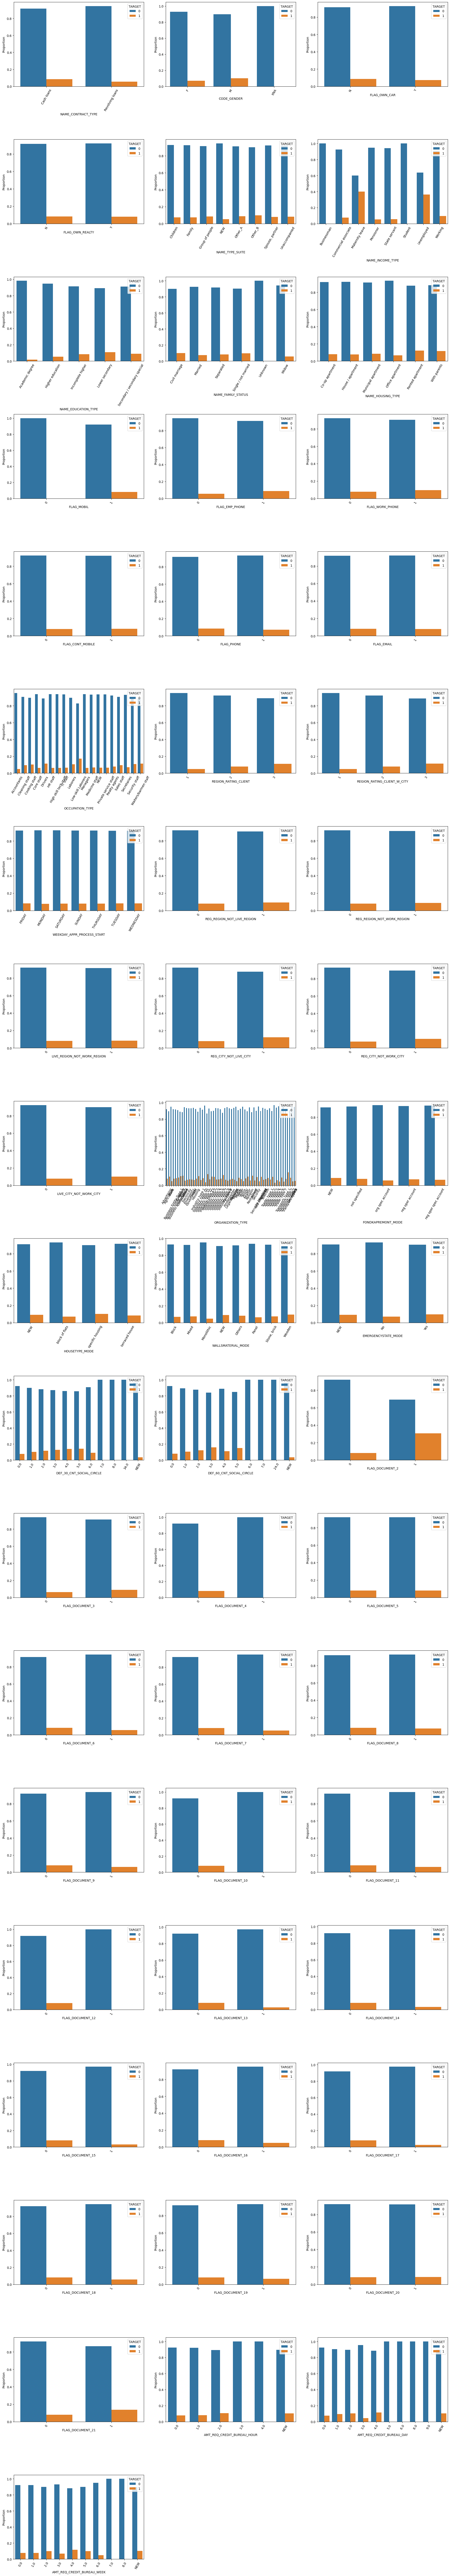

In [48]:
object_columns = df.loc[:, df.dtypes==object].columns

num_rows = (len(object_columns) + 2) // 3  # Округление вверх
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 6 * num_rows))

for i, col in enumerate(object_columns):
    ax = axes[i // num_cols, i % num_cols]
    # Расчет долей
    count_data = df.groupby([col, 'TARGET']).size().unstack(fill_value=0)
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0)
    percentage_data = percentage_data.stack().reset_index(name='Percentage')
    
    sns.barplot(x=col, y='Percentage' , hue='TARGET',  data=percentage_data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    ax.set_ylabel('Proportion')
    
for j in range(i + 1, num_rows * num_cols):
    axes.flatten()[j].set_visible(False)
    
plt.tight_layout()
plt.show()

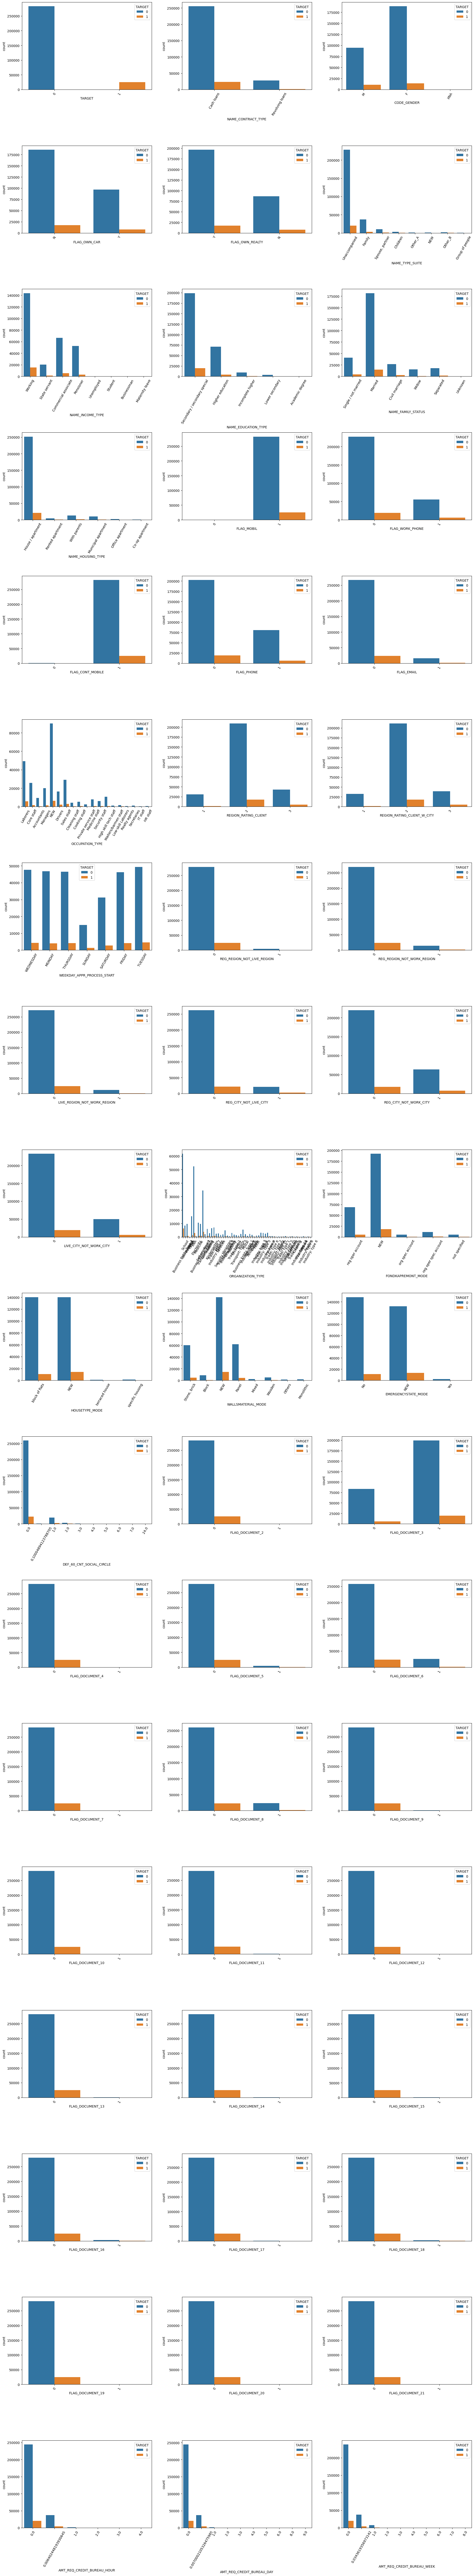

In [88]:
object_columns = df.loc[:, df.dtypes==object].columns

num_rows = (len(object_columns) + 2) // 3  # Округление вверх
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 6 * num_rows))

for i, col in enumerate(object_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(x=col, hue='TARGET', data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    
for j in range(i + 1, num_rows * num_cols):
    axes.flatten()[j].set_visible(False)
    
plt.tight_layout()
plt.show()

In [20]:
len(df.columns)

84

In [21]:
df.to_csv('cleaned_train_3.csv')

### Train vs test

In [6]:
df = pd.read_csv('/kaggle/input/cleaned-train-2/cleaned_train_2.csv')
# df = pd.read_csv('cleaned_train.csv')
df.head(5)

SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  APARTMENTS_AVG  \
0      100002      24700.5    406597.5          202500.0         0.02470   
1      100003      35698.5   1293502.5          270000.0         0.09590   
2      100004       6750.0    135000.0           67500.0         0.11744   
3      100006      29686.5    312682.5          135000.0         0.11744   
4      100007      21865.5    513000.0          121500.0         0.11744   

   BASEMENTAREA_AVG  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0          0.036900       -9461           -637            -2120   
1          0.052900      -16765          -1188             -291   
2          0.088442      -19046           -225            -2531   
3          0.088442      -19005          -3039            -2437   
4          0.088442      -19932          -3038            -3458   

   DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  EXT_SOURCE_1  EXT_SOURCE_2  \
0                 -1134.0            -3648.0      0.083037      0.262949   
1                  -828.0            -1186.0      0.311267      0.622246   
2                  -815.0            -4260.0      0.502130      0.555912   
3                  -617.0            -9833.0      0.502130      0.650442   
4                 -1106.0            -4311.0      0.502130      0.322738   

   EXT_SOURCE_3  LANDAREA_AVG  NONLIVINGAREA_AVG  REGION_POPULATION_RELATIVE  \
0      0.139376      0.036900           0.000000                    0.018801   
1      0.510853      0.013000           0.009800                    0.003541   
2      0.729567      0.066333           0.028358                    0.010032   
3      0.510853      0.066333           0.028358                    0.008019   
4      0.510853      0.066333           0.028358                    0.028663   

   YEARS_BEGINEXPLUATATION_AVG NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0                     0.972200         Cash loans           M            N   
1                     0.985100         Cash loans           F            N   
2                     0.977735    Revolving loans           M            Y   
3                     0.977735         Cash loans           F            N   
4                     0.977735         Cash loans           M            N   

  FLAG_OWN_REALTY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0               Y   Unaccompanied          Working   
1               N          Family    State servant   
2               Y   Unaccompanied          Working   
3               Y   Unaccompanied          Working   
4               Y   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0           0        Laborers                     2   
1           0      Core staff                     1   
2           0        Laborers                     2   
3           0        Laborers                     2   
4           0      Core staff                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1             

In [52]:
# new_numeric_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 
#                        'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',   'EXT_SOURCE_1', 
#                        'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'HOUR_APPR_PROCESS_START', 
#                        'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE', 
#                        'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG', 'TARGET']

# cols = new_numeric_columns + list(df.loc[:, df.dtypes==object].columns)
df = df[cols]

In [22]:
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].replace('NEW', 0).astype(float)
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].replace('NEW', 0).astype(float)
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].replace('NEW', -1).astype(float)
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].replace('NEW', -1).astype(float)
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].replace('NEW', -1).astype(float)

In [23]:
from sklearn.model_selection import train_test_split

seed = 42
y = df['TARGET']
df = df.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, 
                                                    random_state=seed, stratify=y)

проверяем, что таргет по классам разделился правильно и в тестовой выборке и обучающей 

In [24]:
np.mean(y_train), np.mean(y_test)

(0.08072908198107379, 0.08072776937710356)

# Обучение

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from category_encoders import WOEEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from scipy.stats import randint, uniform
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
duplicate_columns = df.columns[df.columns.duplicated()].unique()
if len(duplicate_columns) > 0:
    print(f"Дублирующиеся имена столбцов: {duplicate_columns}")
else:
    print("Дублирующихся имен столбцов нет")

Дублирующихся имен столбцов нет


In [40]:
df[numeric_columns].dtypes

CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
HOUR_APPR_PROCESS_START          int64
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
APARTMENTS_AVG                 float64
BASEMENTAREA_AVG               float64
YEARS_BEGINEXPLUATATION_AVG    float64
ELEVATORS_AVG                  float64
ENTRANCES_AVG                  float64
FLOORSMAX_AVG                  float64
LANDAREA_AVG                   float64
LIVINGAREA_AVG                 float64
NONLIVINGAREA_AVG              float64
OBS_30_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
AMT_REQ_CREDIT_BUREAU_MON

In [39]:
df[object_columns].dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
FLAG_MOBIL                     object
FLAG_EMP_PHONE                 object
FLAG_WORK_PHONE                object
FLAG_CONT_MOBILE               object
FLAG_PHONE                     object
FLAG_EMAIL                     object
OCCUPATION_TYPE                object
REGION_RATING_CLIENT           object
REGION_RATING_CLIENT_W_CITY    object
WEEKDAY_APPR_PROCESS_START     object
REG_REGION_NOT_LIVE_REGION     object
REG_REGION_NOT_WORK_REGION     object
LIVE_REGION_NOT_WORK_REGION    object
REG_CITY_NOT_LIVE_CITY         object
REG_CITY_NOT_WORK_CITY         object
LIVE_CITY_NOT_WORK_CITY        object
ORGANIZATION_TYPE              object
FONDKAPREMON

### OHE

In [54]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
object_columns = df.loc[:, df.dtypes==object].columns

column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_columns),    
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first",
                         min_frequency=0.01), object_columns)
])

In [110]:
# 
model_lr = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(penalty='l2', solver='sag', max_iter=200, class_weight='balanced'))
])

# Параметры для RandomizedSearchCV
param_dist = {
    'regression__C': uniform(100, 200)  # Пример распределения для C
}

# Настройка RandomizedSearchCV с указанием метода оценки (scoring)
searcher_lr_random = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=param_dist,
    n_iter=10,  # Количество итераций
    scoring="roc_auc",
    cv=4,
    n_jobs=-1,
    random_state=42
)

# Обучение RandomizedSearchCV
searcher_lr_random.fit(X_train, y_train)

# Лучшие параметры
best_alpha = searcher_lr_random.best_params_["regression__C"]
print("Лучшее значение гиперпараметра C для логистической регрессии:", best_alpha)
p_pred = searcher_lr_random.predict_proba(X_test)
print(roc_auc_score(y_test, p_pred[:, -1]))
pr_auc = average_precision_score(y_test, prob_y)
print(pr_auc)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site

Лучшее значение гиперпараметра C для логистической регрессии: 220.22300234864176
0.7463838970141445
0.2293929718547089


In [55]:
model_lr = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(penalty='l2', solver='sag', max_iter=200, class_weight='balanced'))
])

# alphas = np.logspace(-1.5, 3, 7) # лучшее значение при с=178
alphas = np.linspace(130, 140, 3) # 130, 190, 13

searcher_lr = GridSearchCV(model_lr, [{"regression__C": alphas}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr.fit(X_train, y_train)

best_alpha = searcher_lr.best_params_["regression__C"]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site

In [56]:
searcher_lr.cv_results_

{'mean_fit_time': array([160.47081226, 161.50577497, 160.95287496]),
 'std_fit_time': array([0.49182216, 0.75793328, 0.92795616]),
 'mean_score_time': array([2.03298211, 1.94214332, 1.51870364]),
 'std_score_time': array([0.16694437, 0.21239554, 0.34933269]),
 'param_regression__C': masked_array(data=[130.0, 135.0, 140.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regression__C': 130.0},
  {'regression__C': 135.0},
  {'regression__C': 140.0}],
 'split0_test_score': array([0.74033458, 0.74033358, 0.74033446]),
 'split1_test_score': array([0.73476684, 0.73476762, 0.73476697]),
 'split2_test_score': array([0.74984036, 0.749842  , 0.74984111]),
 'split3_test_score': array([0.74380062, 0.74380226, 0.74380152]),
 'mean_test_score': array([0.7421856 , 0.74218637, 0.74218601]),
 'std_test_score': array([0.00546964, 0.00547016, 0.00546993]),
 'rank_test_score': array([3, 1, 2], dtype=int32)}

Best alpha = 135.0000


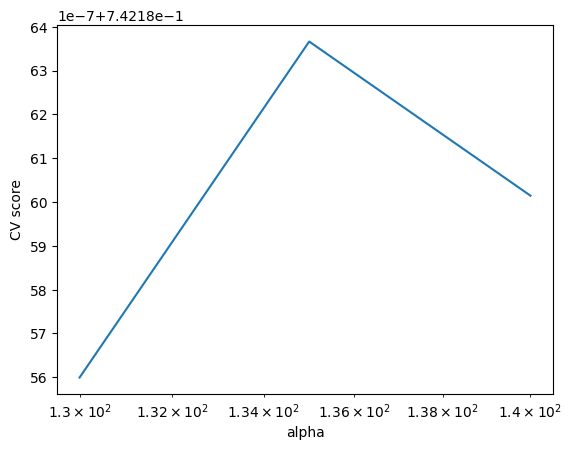

In [57]:
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, searcher_lr.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

In [32]:
y_pred = (searcher_lr.predict_proba(X_test)[:,-1] > 0.7).astype(int)
accuracy_score(y_test, y_pred)

0.8682503292522316

In [58]:
# новое 
p_pred = searcher_lr.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:, -1])

0.7463854395249039

In [72]:
p_pred = searcher_lr.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:, -1])

0.7463854395249039

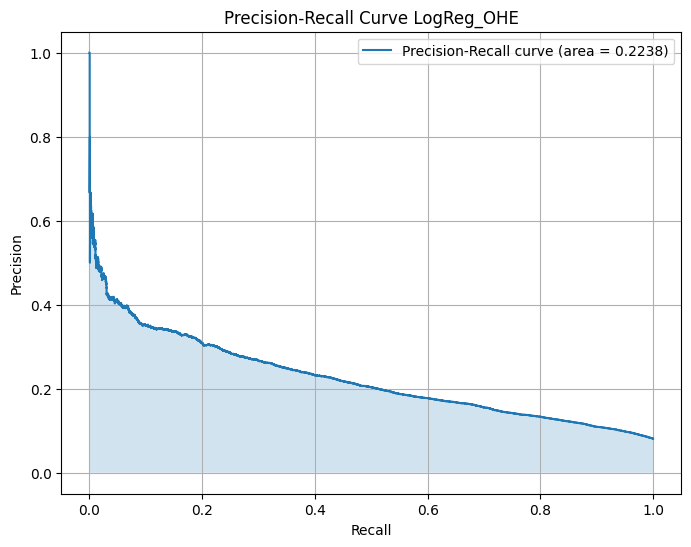

In [73]:


# Получение предсказаний вероятностей для класса интереса
prob_y = p_pred[:, 1]

# Вычисление точности и полноты для различных пороговых значений
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)

# Вычисление средней точности
pr_auc = average_precision_score(y_test, prob_y)

# Построение PR кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.4f})')
plt.fill_between(recall, precision, alpha=0.2) # Заполнение под кривой
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve LogReg_OHE')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [71]:
y_pred = (searcher_lr.predict_proba(X_test)[:,-1] > 0.9).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.47      0.03      0.05      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503

[[56399   139]
 [ 4840   125]]


In [146]:
def visualize_coefficients(classifier, feature_names, name, n_top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-n_top_features:]
    top_negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.concatenate([top_negative_coefficients, top_positive_coefficients])

    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features * 2), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(n_top_features * 2), feature_names[interesting_coefficients], rotation=60, ha='right')
    plt.title('Top Positive and Negative Coefficients with ' + name)
    plt.show()

In [123]:
def get_top_features_by_absolute_weight(classifier, feature_names, n_top_features=10):
    coef = classifier.coef_.ravel()
    top_coefficients_indices = np.argsort(np.abs(coef))[-n_top_features:]
    top_coefficients = coef[top_coefficients_indices]
    top_feature_names = np.array(feature_names)[top_coefficients_indices]
    return list(zip(top_feature_names, top_coefficients))

In [64]:
object_columns_after_ohe = list(best_model.named_steps['ohe_and_scaling'].\
                      named_transformers_['ohe'].get_feature_names_out())

In [124]:
get_top_features_by_absolute_weight(searcher_lr_random.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_ohe)

[('REGION_RATING_CLIENT_W_CITY_3', 0.2825407836247645),
 ('FLAG_DOCUMENT_13_infrequent_sklearn', -0.29011256754520487),
 ('NAME_EDUCATION_TYPE_Secondary / secondary special', 0.29056457630313715),
 ('CODE_GENDER_M', 0.3360996269222433),
 ('FLAG_DOCUMENT_16_1', -0.34401970922194425),
 ('ORGANIZATION_TYPE_Industry: type 9', -0.34488695527439067),
 ('FLAG_DOCUMENT_18_infrequent_sklearn', -0.35071800712743495),
 ('EXT_SOURCE_2', -0.39279477824505704),
 ('NAME_EDUCATION_TYPE_Lower secondary', 0.41168570020284007),
 ('EXT_SOURCE_3', -0.4974587919248927)]

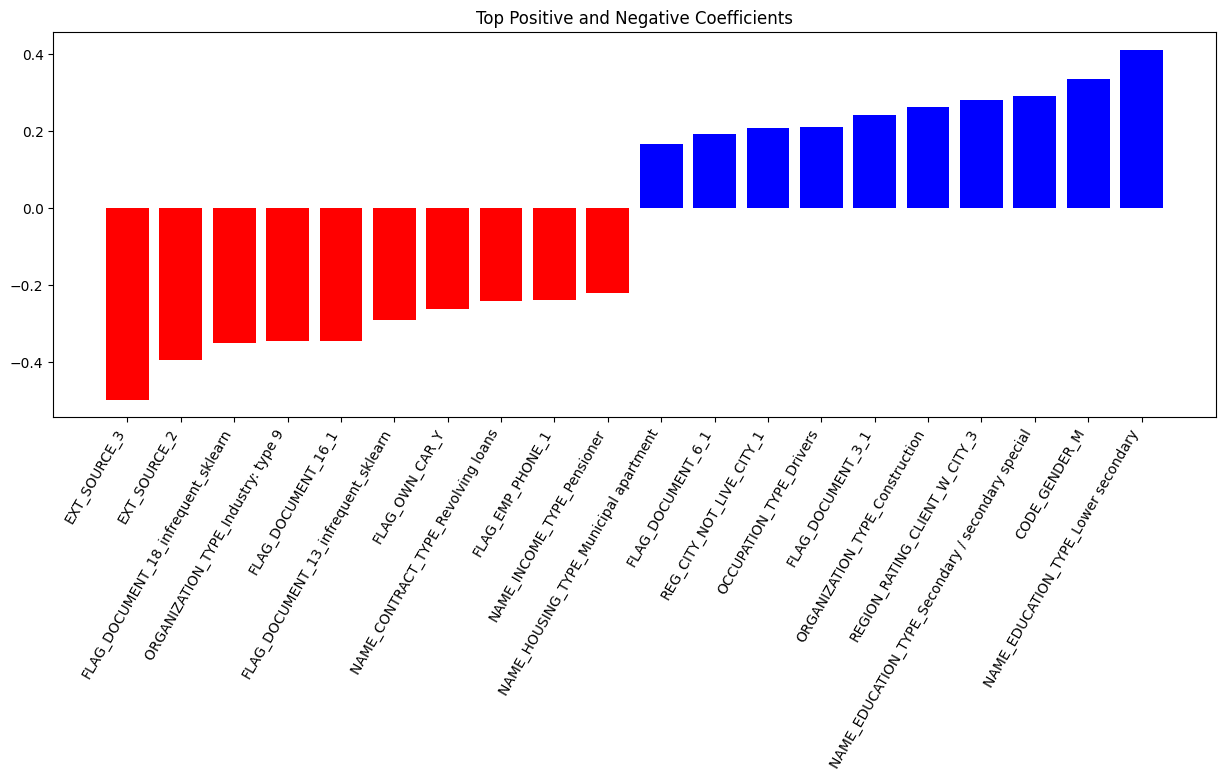

In [111]:
# new
visualize_coefficients(searcher_lr_random.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_ohe)

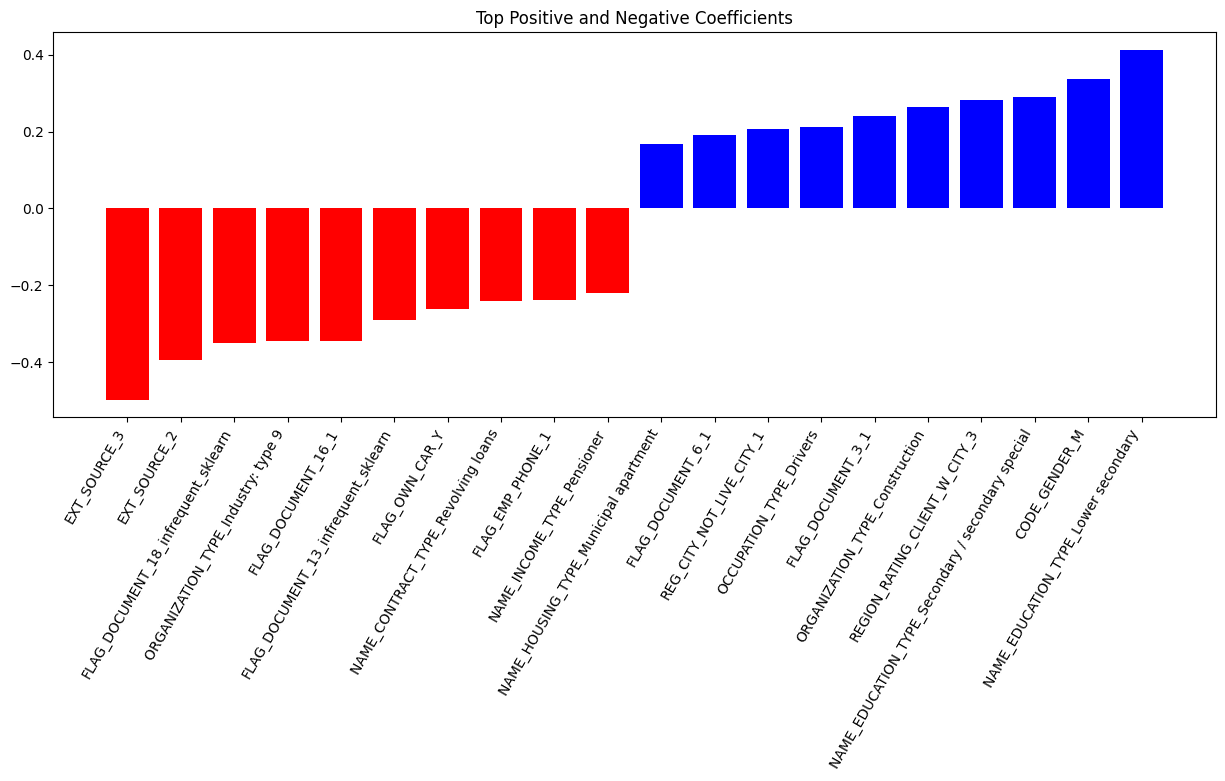

In [65]:
visualize_coefficients(searcher_lr.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_ohe)

In [63]:
best_model = searcher_lr.best_estimator_

coefficients = best_model.named_steps['regression'].coef_
# print("Coefficients:", coefficients)

__________________________

In [79]:
model_rf_ohe = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from tqdm.notebook import tqdm

param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

# Настройка RandomizedSearchCV с указанием метода оценки (scoring)
searcher_rf_ohe = RandomizedSearchCV(model_rf_ohe, param_distributions=param_dist, n_iter=10, scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)

# Обернем обучение в tqdm
with tqdm(total=searcher_rf_ohe.n_iter * searcher_rf_ohe.cv) as pbar:

    # Функция обновления прогресса
    def update_progress(*args):
        pbar.update()

    # Обучение RandomizedSearchCV
    searcher_rf_ohe.fit(X_train, y_train)
# searcher_rf_ohe = GridSearchCV(model_rf_ohe, param_grid, scoring="roc_auc", cv=4, n_jobs=-1)

# searcher_rf_ohe.fit(X_train, y_train)

best_params_rf = searcher_rf_ohe.best_params_
print("Лучшие параметры для RandomForestClassifier:", best_params_rf)

best_model_rf = searcher_rf_ohe.best_estimator_

  0%|          | 0/40 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown cat

Лучшие параметры для RandomForestClassifier: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 207}


In [66]:
model_rf = Pipeline(steps=[
    ('oheand_scaling', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=100))
])

model_rf.fit(X_train, y_train)

Pipeline(steps=[('oheand_scaling',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AP...
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [81]:
# новое
p_pred = searcher_rf_ohe.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.7409695061297348

In [82]:
# новое 
prob_y = p_pred[:, -1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
average_precision_score(y_test, prob_y)

0.2293929718547089

In [64]:
# на меньшем количестве признаков
p_pred = model_rf.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.7141010152891315

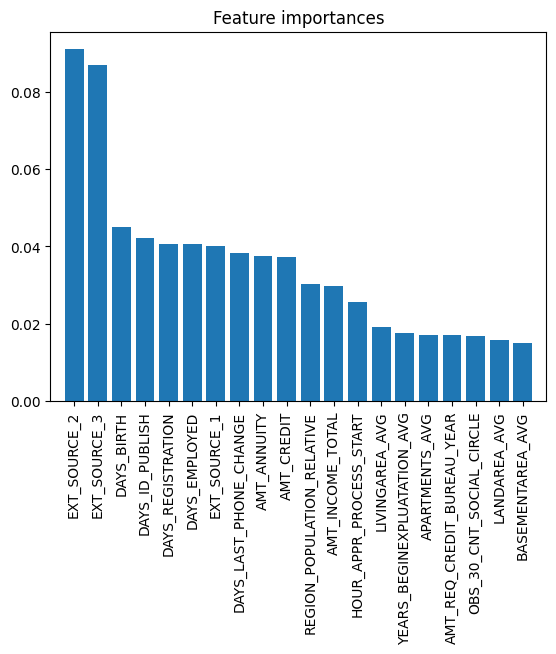

In [90]:
importance = best_model_rf.named_steps['classifier'].feature_importances_
names = list(numeric_columns) + object_columns_after_ohe
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

_______________

In [91]:
from catboost import CatBoostClassifier

In [103]:
model_cb = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('catboost', CatBoostClassifier(random_seed=42, verbose=0))
])

# param_grid_cb = {
#     'catboost__depth': [4, 6, 8],
#     'catboost__learning_rate': [0.01, 0.05] #, 0.1],
# #     'catboost__iterations': [100, 500, 1000]
# }

param_dist = {
    'catboost__iterations': randint(50, 200),
    'catboost__depth': randint(3, 10),
    'catboost__learning_rate': uniform(0.01, 0.2),
    'catboost__l2_leaf_reg': randint(1, 10),
    'catboost__border_count': randint(10, 200)
}

# Настройка RandomizedSearchCV с указанием метода оценки (scoring)
searcher_cb_ohe = RandomizedSearchCV(model_cb, param_distributions=param_dist, n_iter=5, scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)

# Обучение RandomizedSearchCV
searcher_cb_ohe.fit(X_train, y_train) #, cat_features=categorical_features)

# Лучшие параметры
best_params_cb_ohe = searcher_cb_ohe.best_params_

# searcher_cb = GridSearchCV(model_cb, scoring="roc_auc", cv=4, n_jobs=-1, param_grid = None) #param_grid_cb
# model_cb.fit(X_train, y_train)

# best_params_cb = searcher_cb.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown cat

NameError: name 'best_params_cb' is not defined

In [106]:
print("Лучшие параметры для CatBoostClassifier:", best_params_cb_ohe)

# Оценка на тестовой выборке
best_model_cb_ohe = searcher_cb_ohe.best_estimator_
y_pred = best_model_cb_ohe.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'{roc_auc} - roc_auc')
pr_auc = average_precision_score(y_test, prob_y)
print(f'{pr_auc} - pr_auc')

Лучшие параметры для CatBoostClassifier: {'catboost__border_count': 113, 'catboost__depth': 5, 'catboost__iterations': 199, 'catboost__l2_leaf_reg': 5, 'catboost__learning_rate': 0.20398197043239888}
0.7582447360395386 - roc_auc
0.2293929718547089 - pr_auc


In [81]:
# старое
p_pred = model_cb.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.7548686466591265

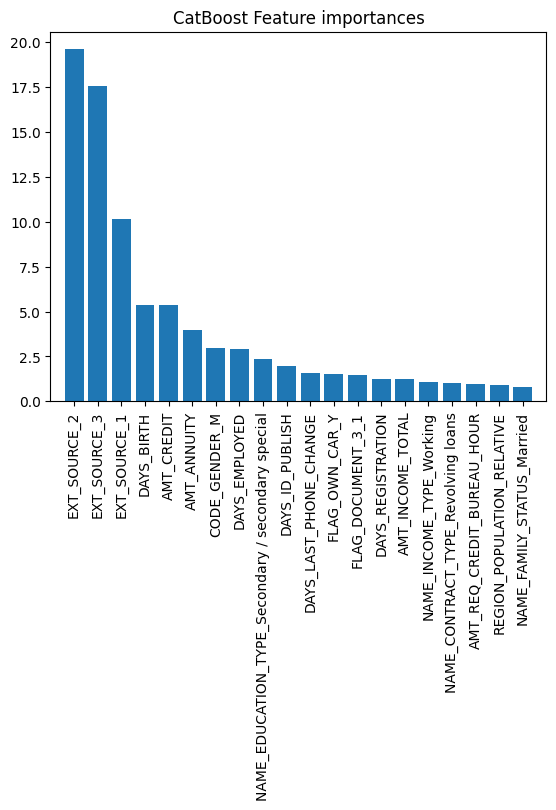

In [109]:
importance = best_model_cb_ohe.named_steps['catboost'].feature_importances_
names = list(numeric_columns) + object_columns_after_ohe
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("CatBoost Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

### WOE

In [26]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
object_columns = df.loc[:, df.dtypes==object].columns


column_transformer_2 = ColumnTransformer([  
        ('scaling', StandardScaler(), numeric_columns),
        ('woe', WOEEncoder(), object_columns)
])

In [138]:
# 
model_lr_woe = Pipeline(steps=[
    ('scaling_and_woe', column_transformer_2),
    ('regression', LogisticRegression(penalty='l2', solver='sag', max_iter=200, class_weight='balanced'))
])

# Параметры для RandomizedSearchCV
param_dist = {
    'regression__C': uniform(10, 300)  # Пример распределения для C
}

# Настройка RandomizedSearchCV с указанием метода оценки (scoring)
searcher_lr_random_woe = RandomizedSearchCV(
    estimator=model_lr_woe,
    param_distributions=param_dist,
    n_iter=5,  # Количество итераций
    scoring="roc_auc",
    cv=4,
    n_jobs=-1,
    random_state=42
)

searcher_lr_random_woe.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('scaling_and_woe',
                                              ColumnTransformer(transformers=[('scaling',
                                                                               StandardScaler(),
                                                                               Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object'))])),
                                             ('regression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=200,
                                                                 solver='sag'))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'regression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b679922e200>},
                   random_state=42, scoring='roc_auc')

In [139]:
p_pred = searcher_lr_random_woe.predict_proba(X_test)
print(roc_auc_score(y_test, p_pred[:, -1]))
pr_auc = average_precision_score(y_test, prob_y)
print(pr_auc)

0.744571671301858
0.2293929718547089


In [33]:
object_columns_after_woe = list(searcher_lr_random_woe.best_estimator_.named_steps['scaling_and_woe'].\
                      named_transformers_['woe'].get_feature_names_out())

NameError: name 'searcher_lr_random_woe' is not defined

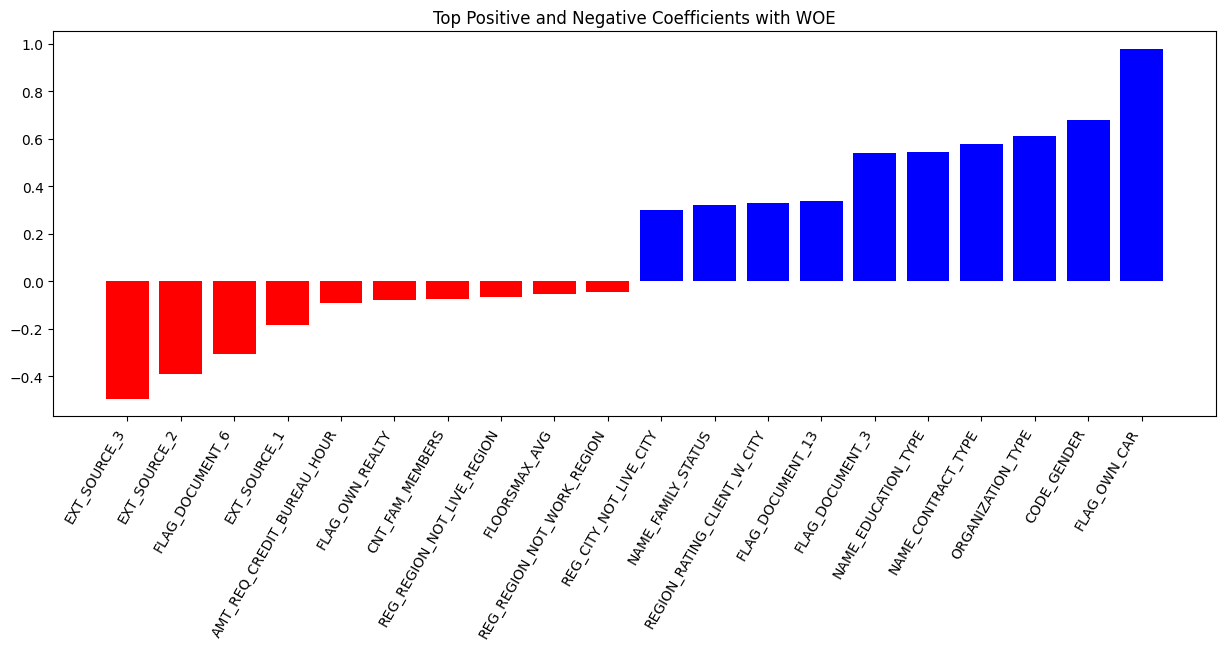

In [147]:
visualize_coefficients(searcher_lr_random_woe.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_woe, name ='WOE')

In [148]:
get_top_features_by_absolute_weight(searcher_lr_random_woe.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_woe)

[('REGION_RATING_CLIENT_W_CITY', 0.32998195393869845),
 ('FLAG_DOCUMENT_13', 0.33766656766667774),
 ('EXT_SOURCE_2', -0.3925653596018034),
 ('EXT_SOURCE_3', -0.495760215693941),
 ('FLAG_DOCUMENT_3', 0.541232834324762),
 ('NAME_EDUCATION_TYPE', 0.5434226077701092),
 ('NAME_CONTRACT_TYPE', 0.5783213224446833),
 ('ORGANIZATION_TYPE', 0.6128163761079215),
 ('CODE_GENDER', 0.6778173509427614),
 ('FLAG_OWN_CAR', 0.978464380692389)]

In [41]:
model_lr_2 = Pipeline(steps=[
    ('woe_and_scaling', column_transformer_2),
    ('regression', LogisticRegression(penalty='l2', solver='lbfgs')) 
])

alphas = np.logspace(-1, 3, 7)
# alphas = [0.3, 0.4, 0.5]

param_grid = [{"regression__C": alphas}]
# param_grid = [
#     {'regression__penalty': ['l1'], 'regression__C': np.logspace(-2, 2, 10)},
#     {'regression__penalty': ['l2'], 'regression__C': np.logspace(-2, 2, 10)},
# #     {'regression__penalty': ['elasticnet'], 'regression__C': np.logspace(-2, 2, 10), 'regression__l1_ratio': np.linspace(0, 1, 10)},
#     {'regression__penalty': ['none']}  # Добавлен вариант без регуляризации
# ]

searcher_lr_2 = GridSearchCV(model_lr_2, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)

searcher_lr_2.fit(X_train, y_train)

/Users/sergey_chirin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

/Users/sergey_chirin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('woe_and_scaling',
                                        ColumnTransformer(transformers=[('woe',
                                                                         WOEEncoder(),
                                                                         Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION...
       'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE',
       'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG'],
      dtype='object'))])),
                                       ('regression', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'regression__C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03])}],
             scoring='roc_auc')

In [44]:
best_alpha = searcher_lr_2.best_params_["regression__C"]
searcher_lr_2.cv_results_

{'mean_fit_time': array([4.68519821, 5.48907723, 4.80638371, 4.69571123, 4.56681614,
        4.90452981, 4.41084576]),
 'std_fit_time': array([0.16789101, 0.21430258, 0.30646951, 0.05664167, 0.11804645,
        0.20083778, 0.76260116]),
 'mean_score_time': array([0.35989394, 0.31452417, 0.33233457, 0.26677694, 0.32400885,
        0.35440922, 0.17971654]),
 'std_score_time': array([0.03614341, 0.02452789, 0.08038615, 0.04135263, 0.08415998,
        0.0450388 , 0.09068989]),
 'param_regression__C': masked_array(data=[0.1, 0.46415888336127786, 2.1544346900318834, 10.0,
                    46.41588833612777, 215.44346900318823, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regression__C': 0.1},
  {'regression__C': 0.46415888336127786},
  {'regression__C': 2.1544346900318834},
  {'regression__C': 10.0},
  {'regression__C': 46.41588833612777},
  {'regression__C': 215.44346900318823},
  {'regres

Best alpha = 0.4642


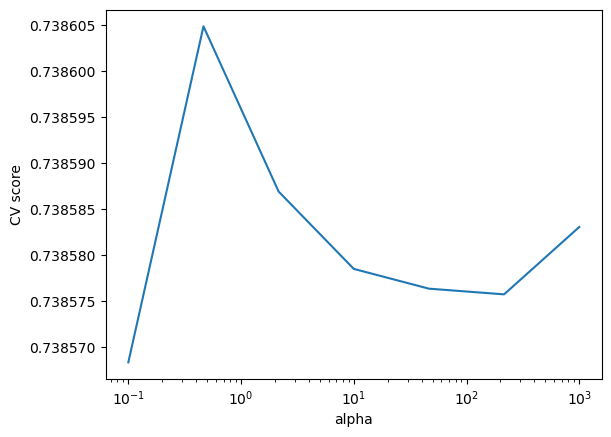

In [45]:
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, searcher_lr_2.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

In [46]:
p_pred = searcher_lr_2.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:, -1])

0.7417575688206495

In [48]:
prob_y = p_pred[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
average_precision_score(y_test, prob_y)

0.2196515765027009

________________


In [28]:
model_rf_woe = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_2),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from tqdm.notebook import tqdm

param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

searcher_rf_woe = RandomizedSearchCV(model_rf_woe, param_distributions=param_dist, n_iter=5,
                                     scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)

searcher_rf_woe.fit(X_train, y_train)
best_params_rf = searcher_rf_woe.best_params_
print("Лучшие параметры для RandomForestClassifier:", best_params_rf)

best_model_rf_woe = searcher_rf_woe.best_estimator_

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

Лучшие параметры для RandomForestClassifier: {'classifier__bootstrap': False, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 101}


In [31]:
# новое 
p_pred = searcher_rf_woe.predict_proba(X_test)
print(roc_auc_score(y_test, p_pred[:,-1]))

prob_y = p_pred[:, -1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
print(average_precision_score(y_test, prob_y))

0.7401556981148987
0.22580487614694425


In [35]:
object_columns_after_woe = list(best_model_rf_woe.named_steps['ohe_and_scaling'].\
                      named_transformers_['woe'].get_feature_names_out())

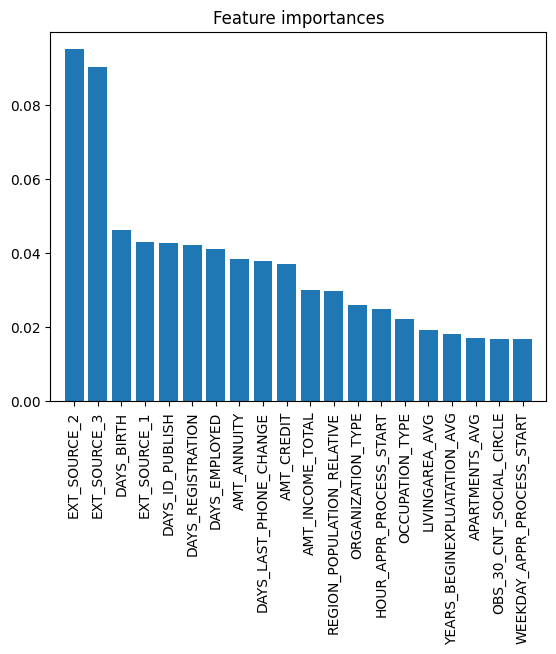

In [36]:
importance = best_model_rf_woe.named_steps['classifier'].feature_importances_
names = list(numeric_columns) + object_columns_after_woe
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

In [51]:
model_rf_2 = Pipeline(steps=[
    ('woe_and_scaling', column_transformer_2),
    ('rf', RandomForestClassifier(n_estimators=100))
])

model_rf_2.fit(X_train, y_train)

Pipeline(steps=[('woe_and_scaling',
                 ColumnTransformer(transformers=[('woe', WOEEncoder(),
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',...
                                                  Index(['AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3',
       'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE',
       'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [52]:
p_pred = model_rf_2.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.7134746258939393

In [53]:
prob_y = p_pred[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
average_precision_score(y_test, prob_y)

0.205486771229672

------

In [155]:
model_cb_woe = Pipeline(steps=[
    ('woe_and_scaling', column_transformer),
    ('catboost', CatBoostClassifier(random_seed=42, verbose=0))
])
param_dist = {
    'catboost__iterations': randint(50, 200),
    'catboost__depth': randint(3, 10),
    'catboost__learning_rate': uniform(0.01, 0.2),
    'catboost__l2_leaf_reg': randint(1, 10),
    'catboost__border_count': randint(10, 200)
}
searcher_cb_woe = RandomizedSearchCV(model_cb_woe, param_distributions=param_dist, n_iter=5, scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)
searcher_cb_woe.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('woe_and_scaling',
                                              ColumnTransformer(transformers=[('scaling',
                                                                               StandardScaler(),
                                                                               Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1...
                                        'catboost__depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b679867fdc0>,
                                        'catboost__iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6798667fd0>,
                                        'catboost__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b679867e4a0>,
                                        'catboost__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b679867d090>},
                   random_state=42, scoring='roc_auc')

In [156]:
best_model_cb_woe = searcher_cb_woe.best_estimator_
y_pred = best_model_cb_woe.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'{roc_auc} - roc_auc')
pr_auc = average_precision_score(y_test, prob_y)
print(f'{pr_auc} - pr_auc')

0.7575177361128878 - roc_auc
0.2293929718547089 - pr_auc


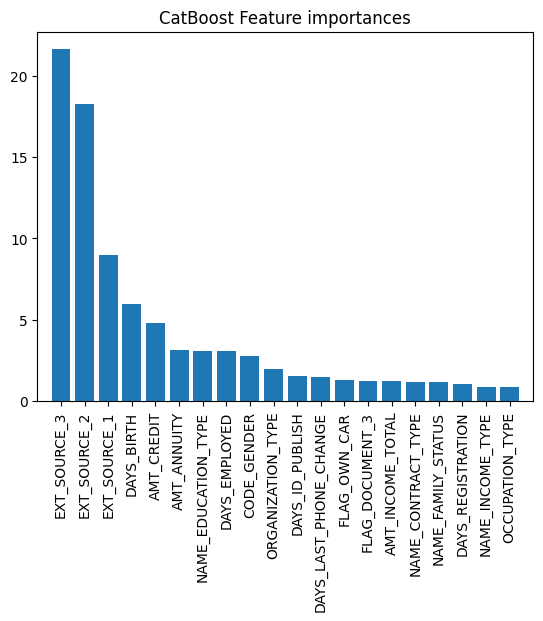

In [158]:
importance = best_model_cb_woe.named_steps['catboost'].feature_importances_
names = list(numeric_columns) + object_columns_after_woe
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("CatBoost Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

### Label encoder

In [37]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
object_columns = df.loc[:, df.dtypes==object].columns

column_transformer_3 = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_columns),    
    ('label_encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), object_columns)
])

In [118]:
# 
model_lr_label = Pipeline(steps=[
    ('scaling_and_labelenc', column_transformer),
    ('regression', LogisticRegression(penalty='l2', solver='sag', max_iter=200, class_weight='balanced'))
])

# Параметры для RandomizedSearchCV
param_dist = {
    'regression__C': uniform(10, 300)  # Пример распределения для C
}

# Настройка RandomizedSearchCV с указанием метода оценки (scoring)
searcher_lr_random_label = RandomizedSearchCV(
    estimator=model_lr_label,
    param_distributions=param_dist,
    n_iter=5,  # Количество итераций
    scoring="roc_auc",
    cv=4,
    n_jobs=-1,
    random_state=42
)

# Обучение RandomizedSearchCV
searcher_lr_random_label.fit(X_train, y_train)

# Лучшие параметры
best_alpha = searcher_lr_random_label.best_params_["regression__C"]
print("Лучшее значение гиперпараметра C для логистической регрессии:", best_alpha)
p_pred = searcher_lr_random_label.predict_proba(X_test)
print(roc_auc_score(y_test, p_pred[:, -1]))
pr_auc = average_precision_score(y_test, prob_y)
print(pr_auc)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Лучшее значение гиперпараметра C для логистической регрессии: 189.59754525911097
0.7434735283245052
0.2293929718547089


In [150]:
object_columns_after_lab = list(searcher_lr_random_label.best_estimator_.named_steps['scaling_and_labelenc'].\
                      named_transformers_['label_encoding'].get_feature_names_out())

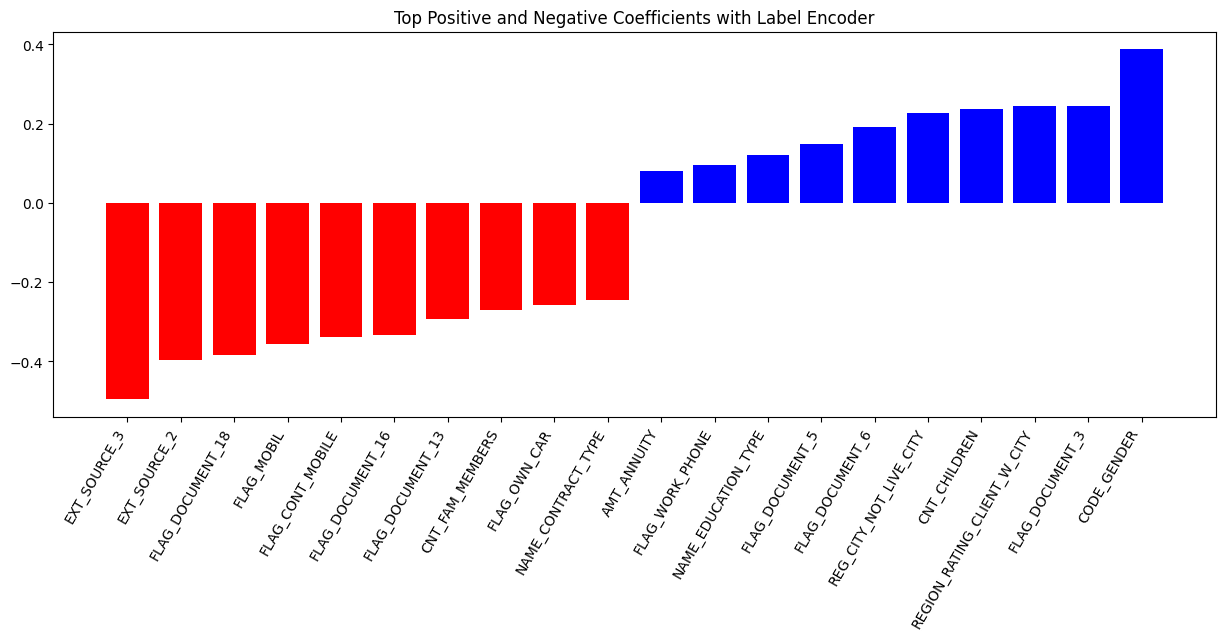

In [152]:
visualize_coefficients(searcher_lr_random_label.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_lab, name ='Label Encoder')

In [153]:
get_top_features_by_absolute_weight(searcher_lr_random_label.best_estimator_.named_steps['regression'], list(numeric_columns) + object_columns_after_woe)

[('FLAG_OWN_CAR', -0.25865072237541686),
 ('CNT_FAM_MEMBERS', -0.2710445362424666),
 ('FLAG_DOCUMENT_13', -0.2918373467185752),
 ('FLAG_DOCUMENT_16', -0.3322156086990922),
 ('FLAG_CONT_MOBILE', -0.33843786887136557),
 ('FLAG_MOBIL', -0.3560275379017464),
 ('FLAG_DOCUMENT_18', -0.3830213106924727),
 ('CODE_GENDER', 0.3878438029440787),
 ('EXT_SOURCE_2', -0.39698588686452974),
 ('EXT_SOURCE_3', -0.4953631744571044)]

In [57]:
model_lr = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(penalty='l2', solver='lbfgs')) # ,class_weight='balanced'))
])

alphas = np.logspace(-1.5, 3, 7)

searcher_lr_3 = GridSearchCV(model_lr, [{"regression__C": alphas}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr_3.fit(X_train, y_train)

best_alpha = searcher_lr.best_params_["regression__C"]

/Users/sergey_chirin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

/Users/sergey_chirin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules

In [63]:
y_pred = searcher_lr_3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9193047493618197

In [64]:
p_pred = searcher_lr_3.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:, -1])

0.7384187811265224

In [65]:
prob_y = p_pred[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
average_precision_score(y_test, prob_y)

0.21774205836299823

_____________

In [38]:
model_rf_label = Pipeline(steps=[
    ('scaling_and_label', column_transformer_3),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from tqdm.notebook import tqdm

param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

searcher_rf_label = RandomizedSearchCV(model_rf_label, param_distributions=param_dist, n_iter=5,
                                     scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)

searcher_rf_label.fit(X_train, y_train)
best_params_rf = searcher_rf_label.best_params_
print("Лучшие параметры для RandomForestClassifier:", best_params_rf)

best_model_rf_label = searcher_rf_label.best_estimator_

Лучшие параметры для RandomForestClassifier: {'classifier__bootstrap': False, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 101}


In [39]:
# новое 
p_pred = searcher_rf_label.predict_proba(X_test)
print(roc_auc_score(y_test, p_pred[:,-1]))

prob_y = p_pred[:, -1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
print(average_precision_score(y_test, prob_y))

0.7390760973280828
0.22980676485947532


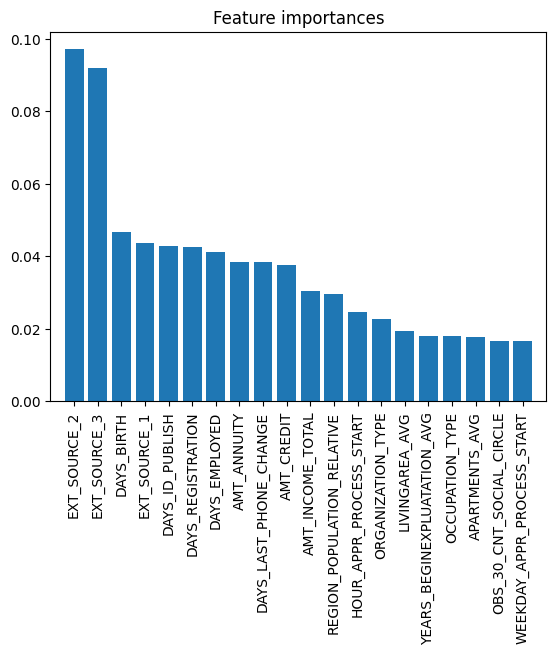

In [41]:
importance = best_model_rf_label.named_steps['classifier'].feature_importances_
names = list(numeric_columns) + object_columns_after_lab
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

In [40]:
object_columns_after_lab = list(best_model_rf_label.named_steps['scaling_and_label'].\
                      named_transformers_['label_encoding'].get_feature_names_out())

In [60]:
model_rf_3 = Pipeline(steps=[
    ('oheand_scaling', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=100))
])

model_rf_3.fit(X_train, y_train)

Pipeline(steps=[('oheand_scaling',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  Index(['AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3',
       'HOUR_APPR_PROCESS_START', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVIN...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [61]:
p_pred = model_rf_3.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.7182307280469103

In [62]:
prob_y = p_pred[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
average_precision_score(y_test, prob_y)

0.20978967308981766

------

In [159]:
model_cb_label = Pipeline(steps=[
    ('scaling_and_labelenc', column_transformer),
    ('catboost', CatBoostClassifier(random_seed=42, verbose=0))
])
param_dist = {
    'catboost__iterations': randint(50, 200),
    'catboost__depth': randint(3, 10),
    'catboost__learning_rate': uniform(0.01, 0.2),
    'catboost__l2_leaf_reg': randint(1, 10),
    'catboost__border_count': randint(10, 200)
}
searcher_cb_label = RandomizedSearchCV(model_cb_label, param_distributions=param_dist, n_iter=5, scoring="roc_auc", cv=4, n_jobs=-1, random_state=42)
searcher_cb_label.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('scaling_and_labelenc',
                                              ColumnTransformer(transformers=[('scaling',
                                                                               StandardScaler(),
                                                                               Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOU...
                                        'catboost__depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6798637f10>,
                                        'catboost__iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6799108040>,
                                        'catboost__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6798667e80>,
                                        'catboost__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b6798665240>},
                   random_state=42, scoring='roc_auc')

In [160]:
best_model_cb_label = searcher_cb_label.best_estimator_
y_pred = best_model_cb_label.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'{roc_auc} - roc_auc')
pr_auc = average_precision_score(y_test, prob_y)
print(f'{pr_auc} - pr_auc')

0.7575177361128878 - roc_auc
0.2293929718547089 - pr_auc


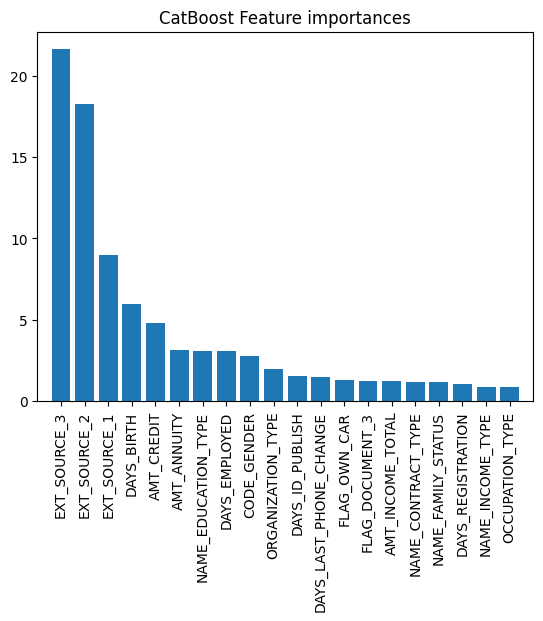

In [162]:
importance = best_model_cb_label.named_steps['catboost'].feature_importances_
names = list(numeric_columns) + object_columns_after_lab
indices = np.argsort(importance)[::-1][:20]
plt.figure()
plt.title("CatBoost Feature importances")
plt.bar(range(20), importance[indices], align="center")
plt.xticks(range(20), np.array(names)[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

## NN


In [163]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from time import perf_counter
from IPython.display import clear_output

In [164]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [173]:
X_train.shape

(246008, 83)

In [175]:
class CreditModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(83, 16)
        self.linear2 = nn.Linear(16, 8)
        self.linear3 = nn.Linear(8, 4)
        self.linear4 = nn.Linear(4, 1)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        output = self.activation1(self.linear1(x))
        output = self.activation1(self.linear2(output))
        output = self.activation1(self.linear3(output))
        
        output = self.activation2(self.linear4(output))

        return output

In [166]:
numeric_columns = df.loc[:, df.dtypes!=object].columns
object_columns = df.loc[:, df.dtypes==object].columns
    
column_transformer = ColumnTransformer([
    ('woe', WOEEncoder(), object_columns),  
#     ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first", 
#                           min_frequency=0.01), object_columns),    
    ('scaling', StandardScaler(), numeric_columns)
])

X_train_transform = column_transformer.fit_transform(X_train, y_train)
X_test_transform = column_transformer.transform(X_test) 

In [167]:
class CreditDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [168]:
train_dataset = CreditDataset(X_train_transform, y_train.values)
test_dataset = CreditDataset(X_test_transform, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [185]:
def train_model(model: nn.Module):
    model.train()
    train_loss = 0
    predictions = []
    actuals = []
    for x, y in tqdm(train_loader, desc='Train'):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output.squeeze(), y)
        train_loss += loss.item()
        predictions.extend(output.tolist())  # сохраняем вероятности
        actuals.extend(y.tolist())
        loss.backward()
        optimizer.step()
    train_loss /= len(train_loader)
    auc_roc = roc_auc_score(actuals, predictions)
    return train_loss, auc_roc


@torch.inference_mode()
def evaluate_model(model: nn.Module, test_loader):
    model.eval()
    total_loss = 0
    predictions = []
    actuals = []
    for data, target in tqdm(test_loader, desc='Evaluation'):
        data, target = data.to(device), target.to(device)
        output = model(data).squeeze()
        loss = loss_fn(output, target)
        total_loss += loss.item()
        predictions.extend(output.tolist())  # сохраняем вероятности
        actuals.extend(target.tolist())  # сохраняем реальные метки
    total_loss /= len(test_loader)
    auc_roc = roc_auc_score(actuals, predictions)
    pr_auc = average_precision_score(y_test, prob_y)
    return total_loss, auc_roc, pr_auc

In [170]:
def plot_stats(train_loss, valid_loss, train_auc, valid_auc):
    plt.figure(figsize=(16, 8))
    plt.title('Loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()
    plt.figure(figsize=(16, 8))
    plt.title('AUC-ROC')
    plt.plot(valid_auc, label='Valid auc-roc')
    plt.plot(train_auc, label='Train auc-roc')
    plt.legend()
    plt.grid()
    plt.show()

In [178]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=15)

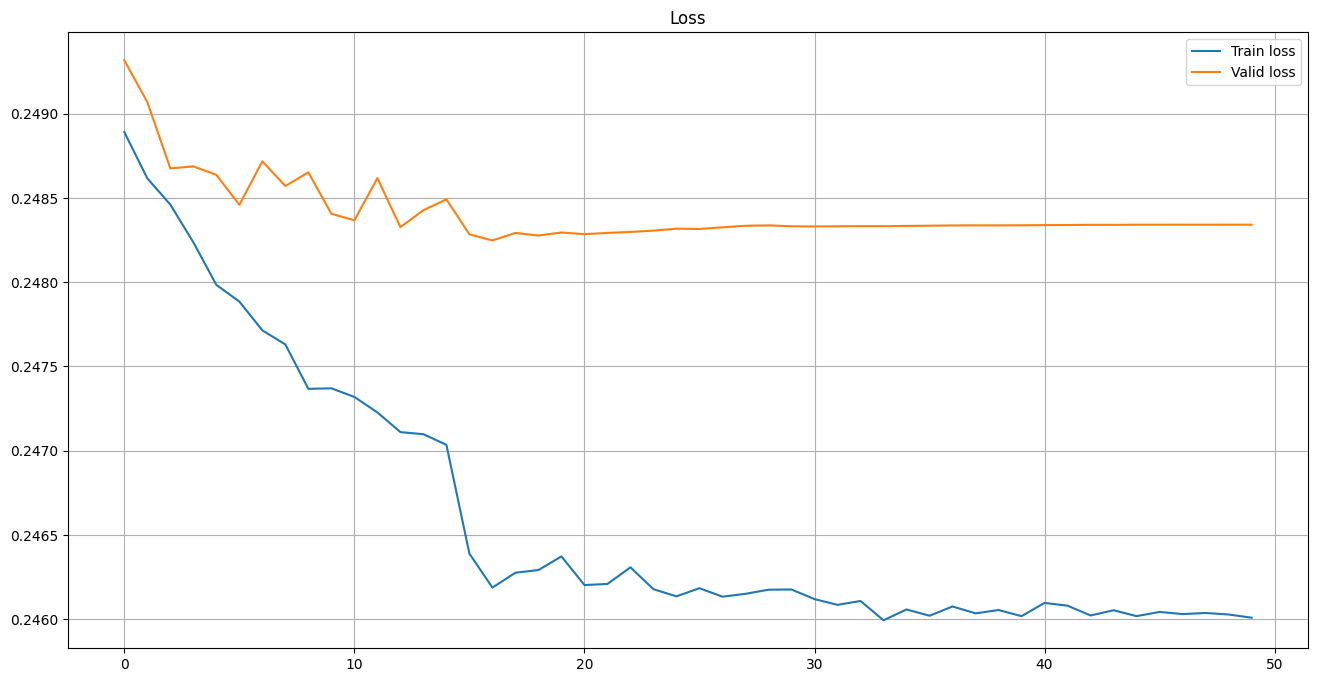

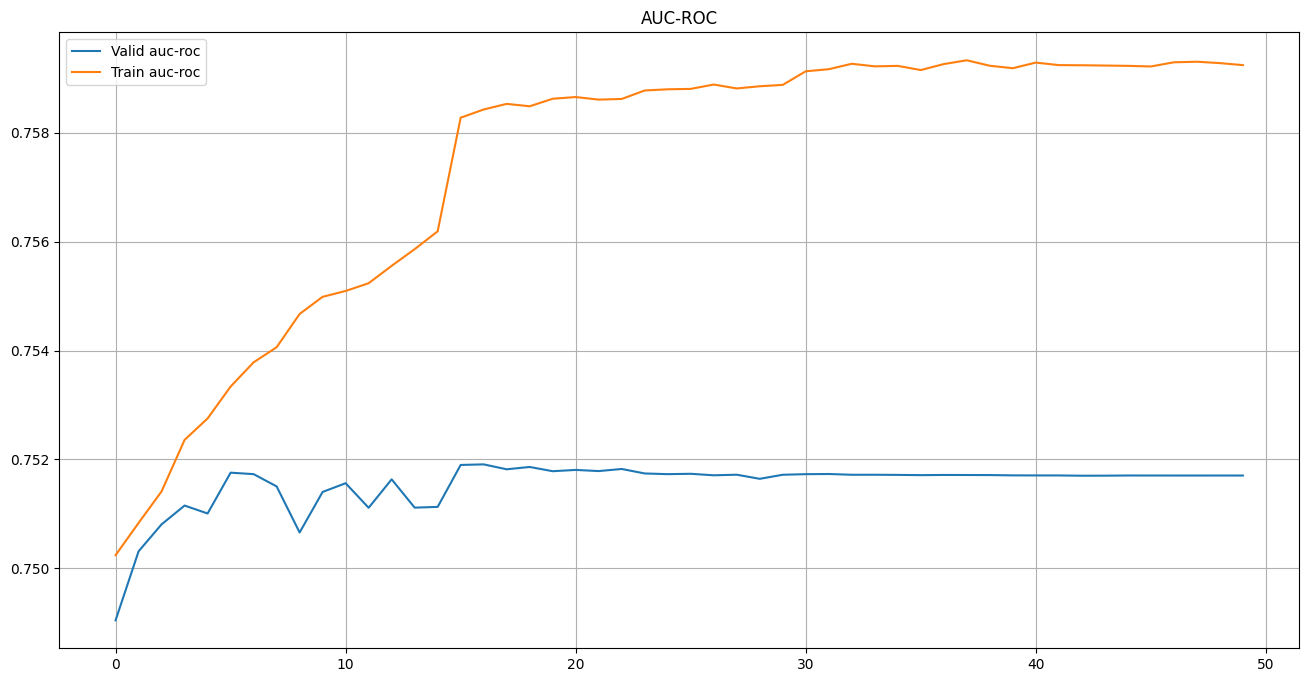

Total training and evaluation time 280.15578


In [186]:
num_epochs = 50

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history, valid_pr_history = [], [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc, valid_pr = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    valid_pr_history.append(valid_pr)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [181]:
max(valid_auc_history)

0.7489715264982153

In [187]:
_

0.2293929718547089

In [235]:
class CreditModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(83, 32)
#         self.linear2 = nn.Linear(32, 16)
#         self.linear3 = nn.Linear(16, 8)
        self.linear4 = nn.Linear(32, 8)
        self.linear5 = nn.Linear(8, 1)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        output = self.activation1(self.linear1(x))
        output = self.activation1(self.linear4(output))
#         output = self.activation1(self.linear3(output))
#         output = self.activation1(self.linear4(output))
        
        output = self.activation2(self.linear5(output))

        return output

In [237]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-2)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=15)

In [238]:
train_dataset = CreditDataset(X_train_transform, y_train.values)
test_dataset = CreditDataset(X_test_transform, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

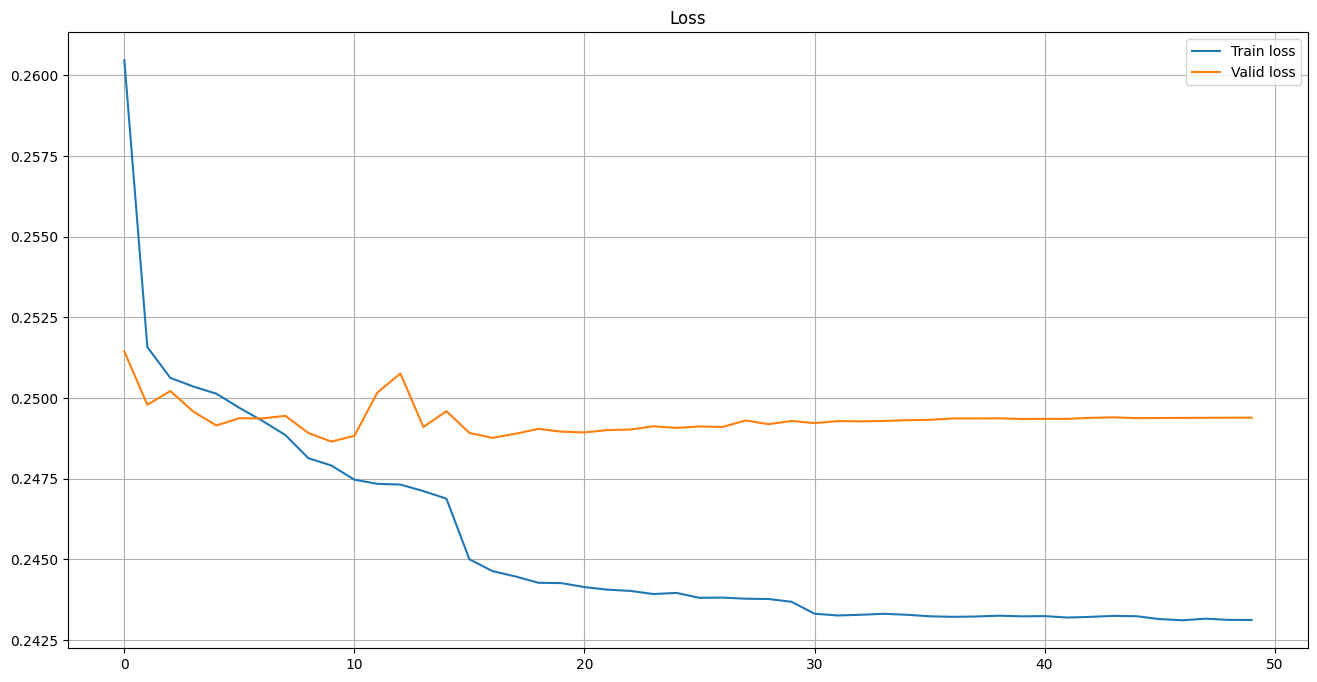

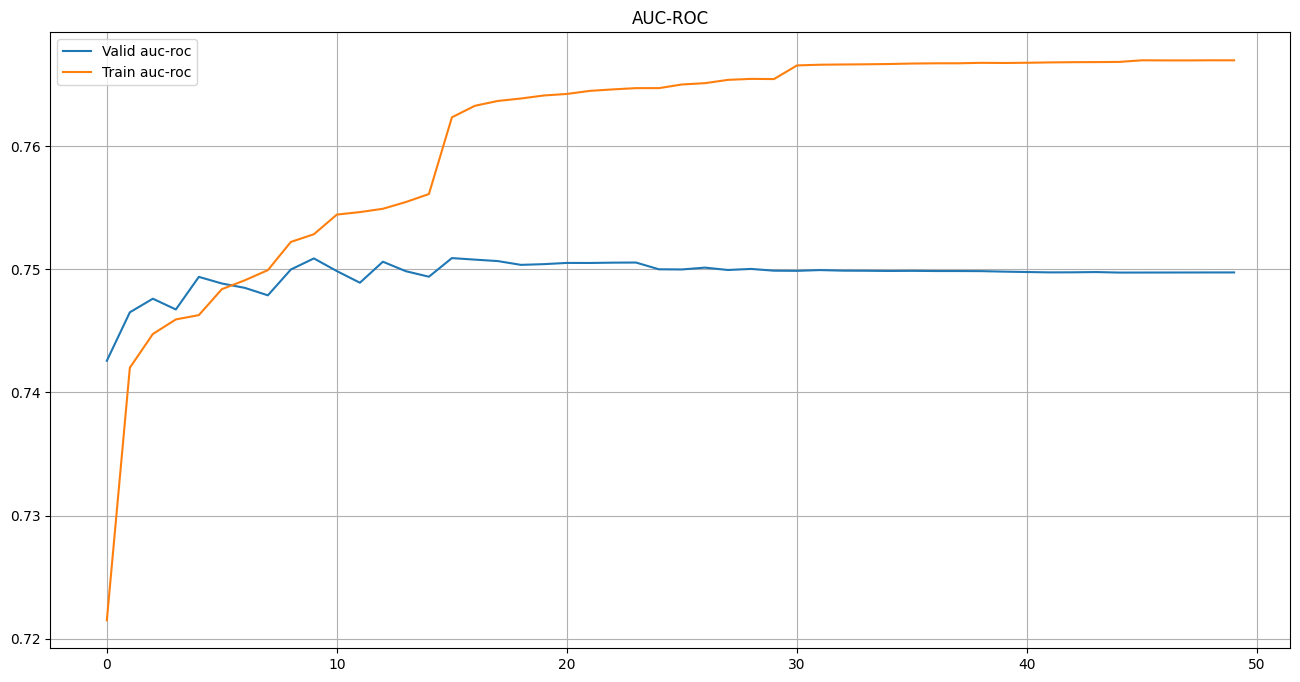

Total training and evaluation time 298.40549


In [239]:
num_epochs = 50

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history, valid_pr_history = [], [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc, valid_pr = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    valid_pr_history.append(valid_pr)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [243]:
print(valid_auc_history) 
print(valid_pr_history)
print('\n')
print(max(valid_auc_history))

[0.7425748875614746, 0.746510723103751, 0.7476165732913301, 0.7467418076024548, 0.749390685094576, 0.7488514992118056, 0.7484961107888939, 0.7478897544404806, 0.7499897439065215, 0.7508897116562907, 0.7498596030218534, 0.7489139655539893, 0.7506202318204864, 0.7498495392969222, 0.7494021880212319, 0.7509159289956291, 0.7507908039427146, 0.7506719041497351, 0.7503652936219103, 0.7504241993647778, 0.7505233778192725, 0.7505197210356823, 0.7505458279412252, 0.7505546198963156, 0.7500058138049868, 0.7499924798147506, 0.7501424221914647, 0.7499491345499361, 0.7500364752140073, 0.7498918211911554, 0.7498800510859612, 0.7499423695893541, 0.7498947833105466, 0.7498870689755595, 0.7498694245049102, 0.7498804892587636, 0.7498639687191642, 0.7498631386845062, 0.7498562454782258, 0.7498160600449209, 0.7497840930234446, 0.7497541049043399, 0.7497608199915948, 0.7497810454069213, 0.749739887443738, 0.7497419839046662, 0.7497449638359599, 0.7497463442584062, 0.7497493402204123, 0.7497502717829148]
[0

In [248]:
class CreditModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(83, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 8)
        self.linear5 = nn.Linear(8, 1)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        output = self.activation1(self.linear1(x))
        output = self.activation1(self.linear2(output))
        output = self.activation1(self.linear3(output))
        output = self.activation1(self.linear4(output))
        
        output = self.activation2(self.linear5(output))

        return output

In [249]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-2)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=15)

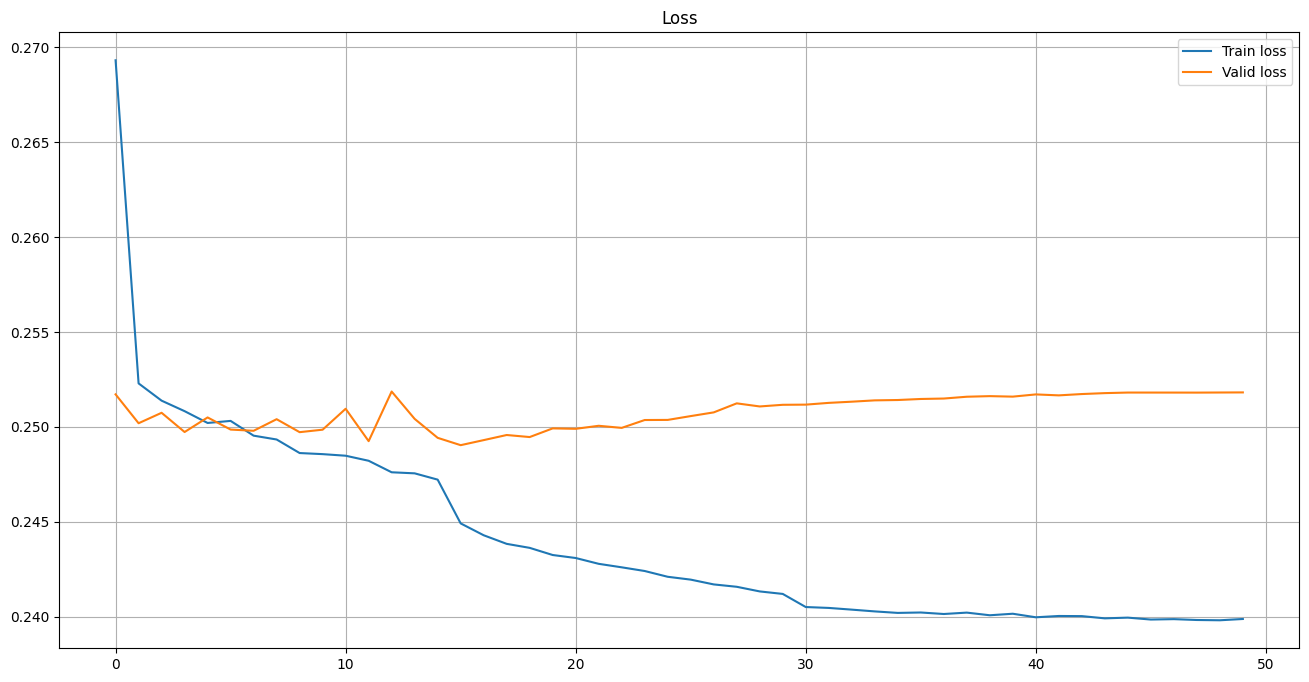

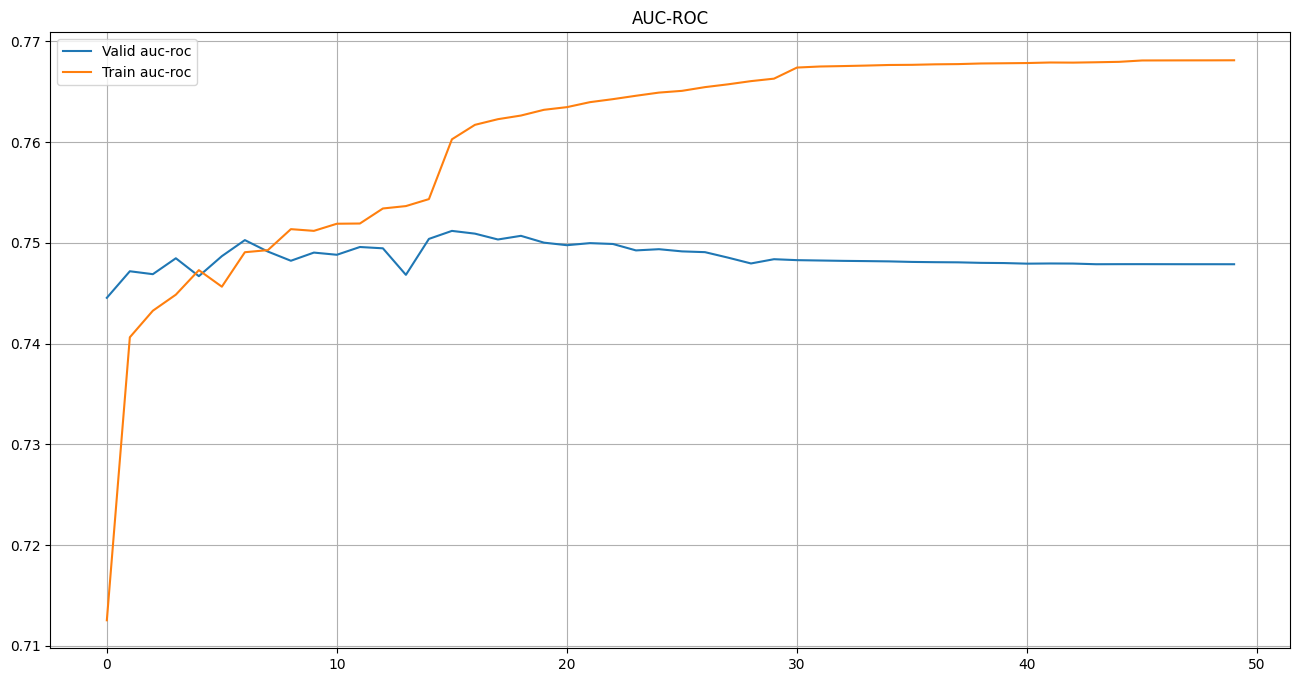

Total training and evaluation time 327.56623


In [250]:
num_epochs = 50

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history, valid_pr_history = [], [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc, valid_pr = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    valid_pr_history.append(valid_pr)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [251]:
print(valid_auc_history) 
print(valid_pr_history)
print('\n')
print(max(valid_auc_history))

[0.7445408264302414, 0.7471760510990709, 0.7468862781627108, 0.7484642524200231, 0.746687504455202, 0.7486739519485456, 0.7502660314514737, 0.7491291529296822, 0.7482173188904451, 0.7490279474806792, 0.7488114865539551, 0.7495825994384192, 0.7494523979932826, 0.7468192626606202, 0.7503865378780616, 0.7511809362627074, 0.7509083999044284, 0.750327931375157, 0.750691310217545, 0.7500142513032169, 0.7497605635001985, 0.7499669517960401, 0.7498812818884265, 0.7492448750792496, 0.7493646904040193, 0.7491478162411562, 0.7490713354940597, 0.7485288846895548, 0.7479493512851662, 0.7483719653906185, 0.7482778490788237, 0.7482427863486871, 0.7482074635647737, 0.7481838378572538, 0.748155572149124, 0.7481020099770166, 0.7480763554937981, 0.7480608252959794, 0.7480095270166841, 0.7479896008413204, 0.7479297599735699, 0.7479480510162813, 0.7479389580400382, 0.7478730896244707, 0.7478794413489138, 0.7478808930189705, 0.7478773466691759, 0.7478745786995223, 0.7478746339164202, 0.7478723094631397]
[0.

In [252]:
class CreditModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(83, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 8)
        self.linear5 = nn.Linear(8, 4)
        self.linear6 = nn.Linear(4, 1)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        
    def forward(self, x):
        output = self.activation1(self.linear1(x))
        output = self.activation1(self.linear2(output))
        output = self.activation1(self.linear3(output))
        output = self.activation1(self.linear4(output)) 
        output = self.activation1(self.linear5(output))

        output = self.activation2(self.linear6(output))

        return output

In [253]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-2)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=15)

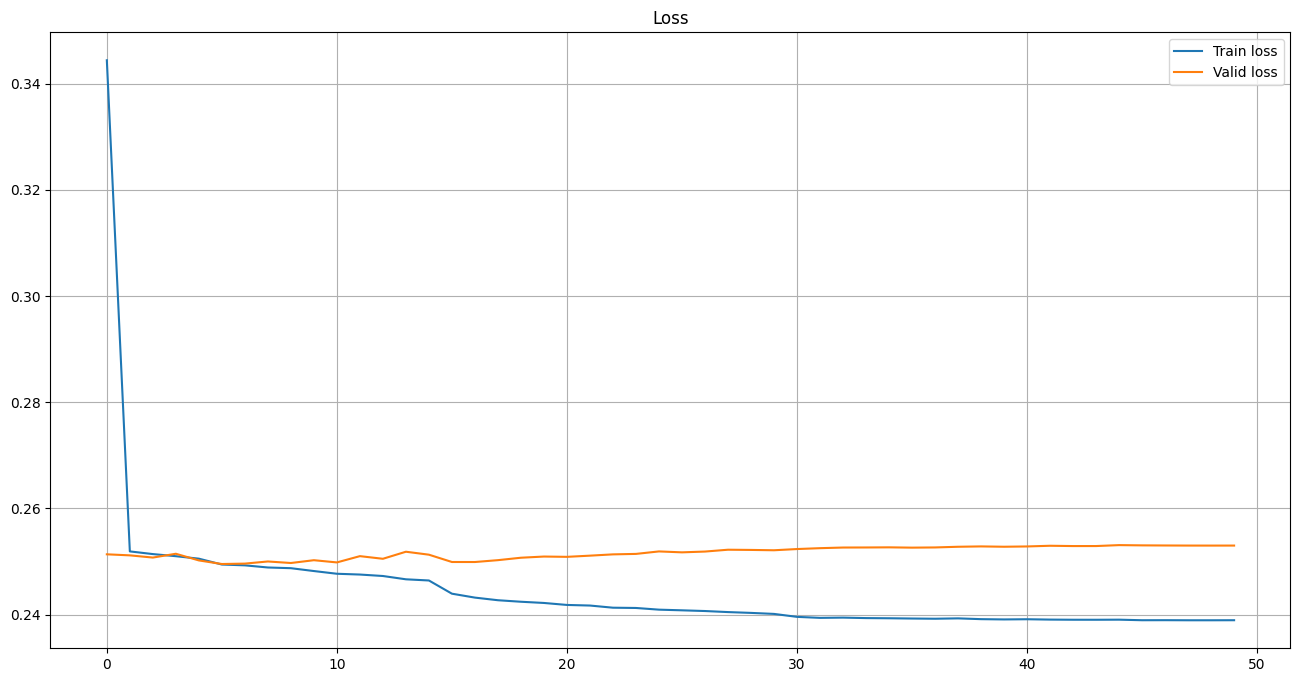

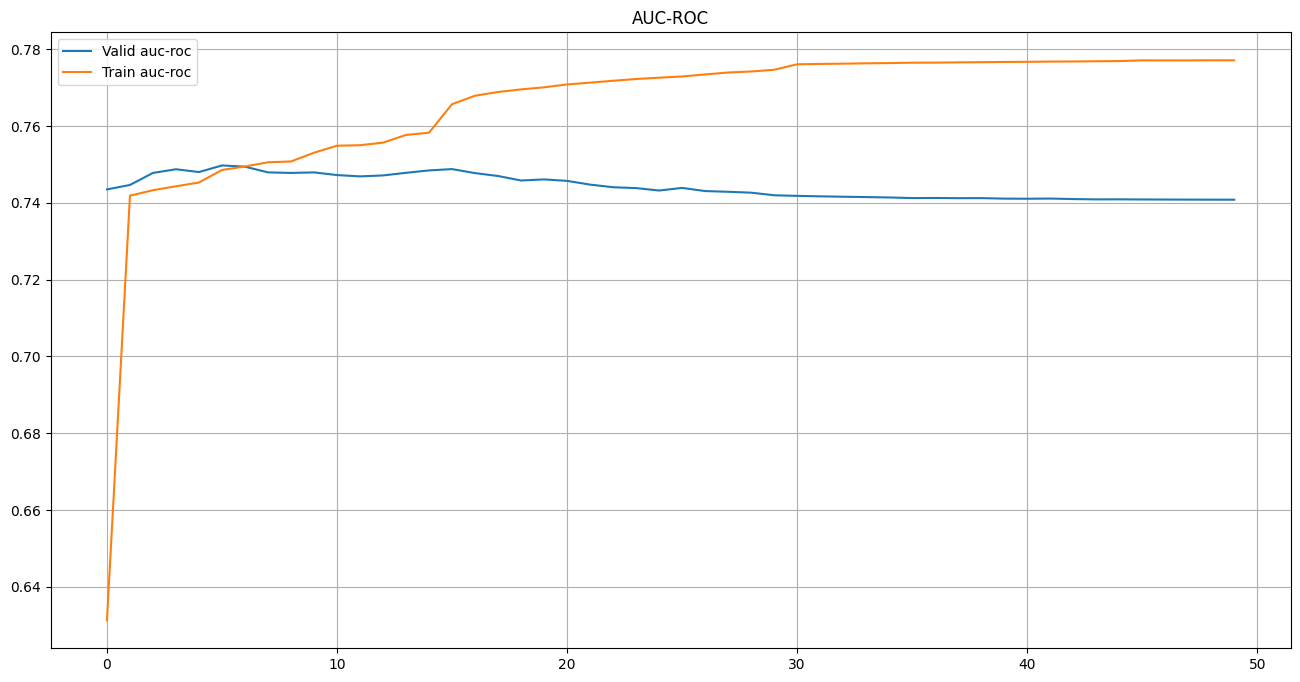

Total training and evaluation time 331.63636


In [254]:
num_epochs = 50

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history, valid_pr_history = [], [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc, valid_pr = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    valid_pr_history.append(valid_pr)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [255]:
print(valid_auc_history) 
print(valid_pr_history)
print('\n')
print(max(valid_auc_history))

[0.7434932371946581, 0.7446524037500895, 0.7477885347419556, 0.7487442323723705, 0.7480115878538072, 0.7497332970398007, 0.7494153136122085, 0.7479259696007109, 0.7477883174367447, 0.7479224731242436, 0.7472297379544961, 0.7468843722891398, 0.7471363554930857, 0.747815503743581, 0.748439565123112, 0.7487826597708955, 0.7477371705586208, 0.7469831660065397, 0.7458136845783514, 0.7460985717098467, 0.7457141730412794, 0.7447441742343206, 0.7440586778217625, 0.743838479957887, 0.7432053006654491, 0.7438824735759535, 0.7430639382821853, 0.7428749771517821, 0.7426439941809229, 0.7419692757505874, 0.7418119004669461, 0.7416870283430474, 0.7415885249596587, 0.7414968096923253, 0.7413969365736319, 0.7412353843988466, 0.7412620345674167, 0.7412110515587962, 0.7412269219639532, 0.741093425316848, 0.7410668268027952, 0.7411124163673288, 0.7409795680734758, 0.740894747793613, 0.740909246682275, 0.7408747699637319, 0.7408546389514887, 0.7408384123082812, 0.740824720298804, 0.7408110906309856]
[0.229

-----------------------------------------------------------

In [21]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-1)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.05)

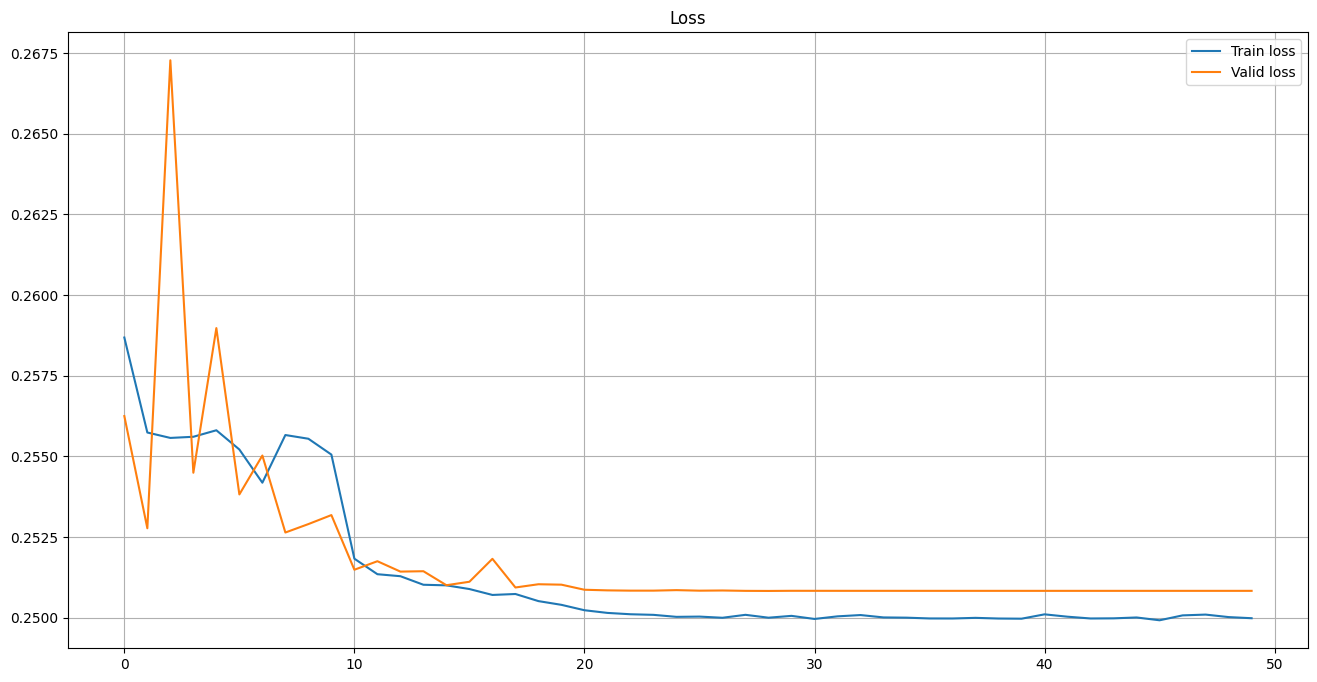

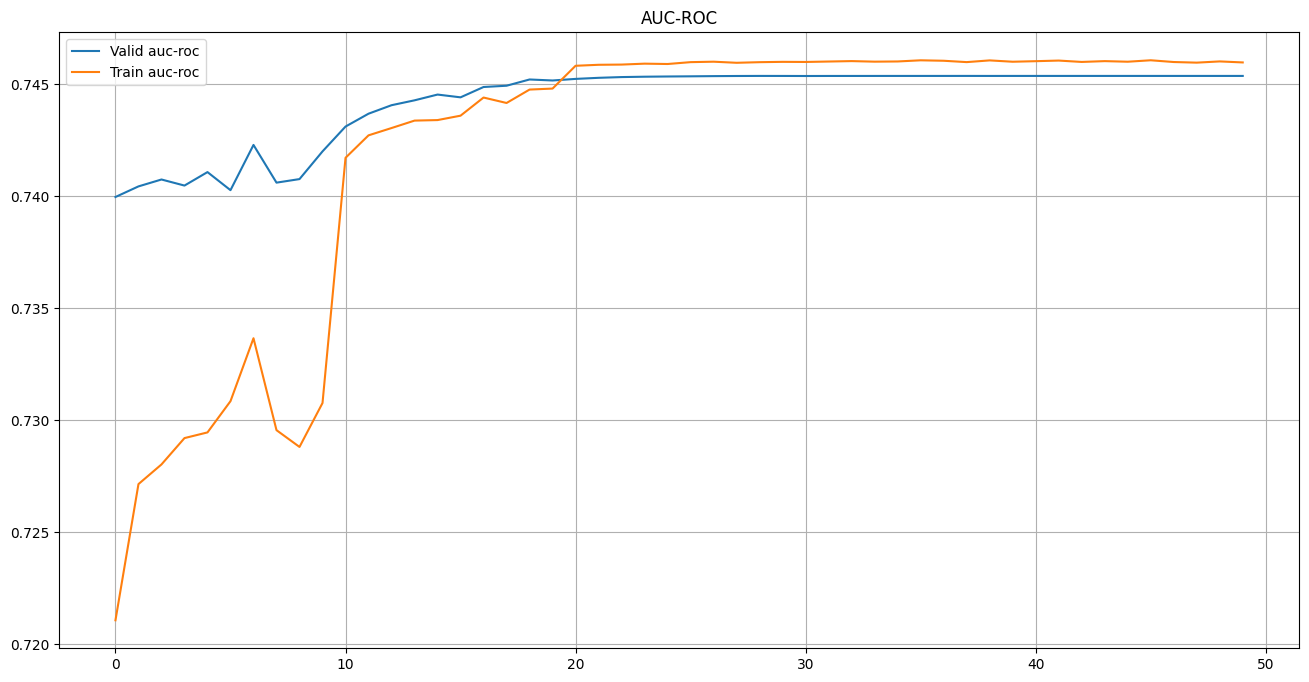

Total training and evaluation time 227.01308


In [22]:
num_epochs = 50

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history = [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [25]:
train_dataset = CreditDataset(X_train_transform, y_train.values)
test_dataset = CreditDataset(X_test_transform, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

In [26]:
net = CreditModel().to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-2)
loss_fn = nn.BCELoss()
scheduler = StepLR(optimizer, step_size=15)

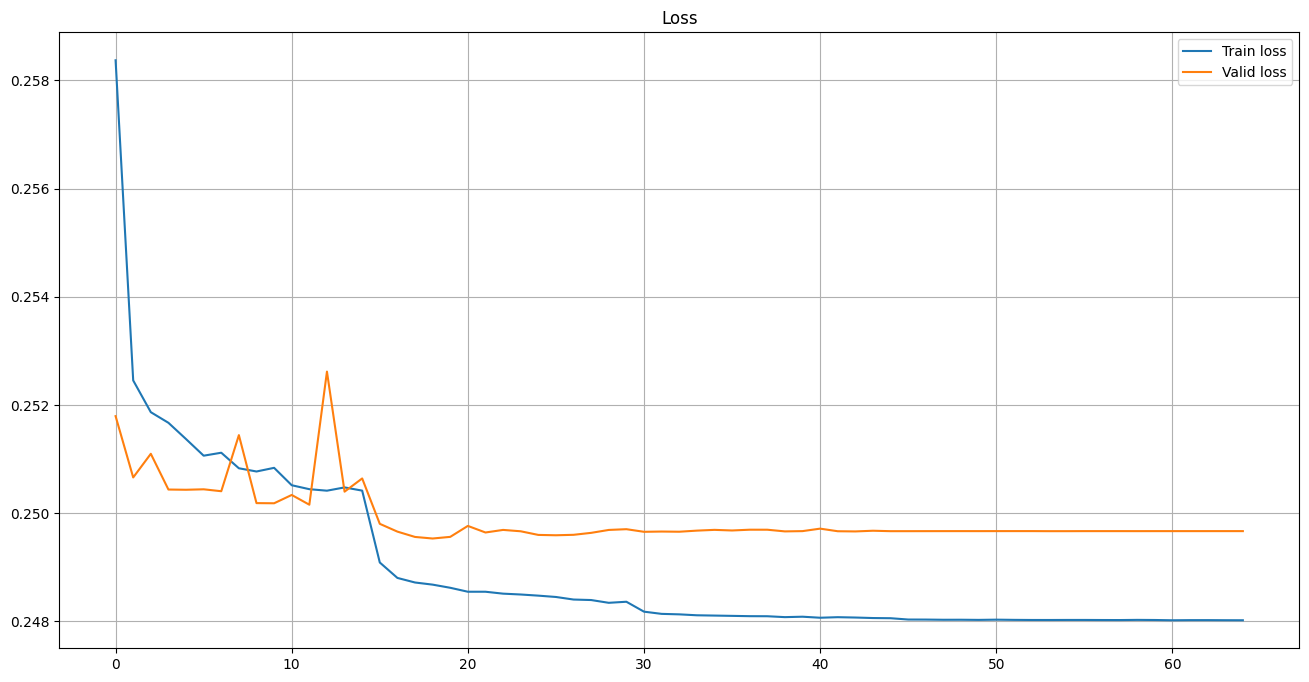

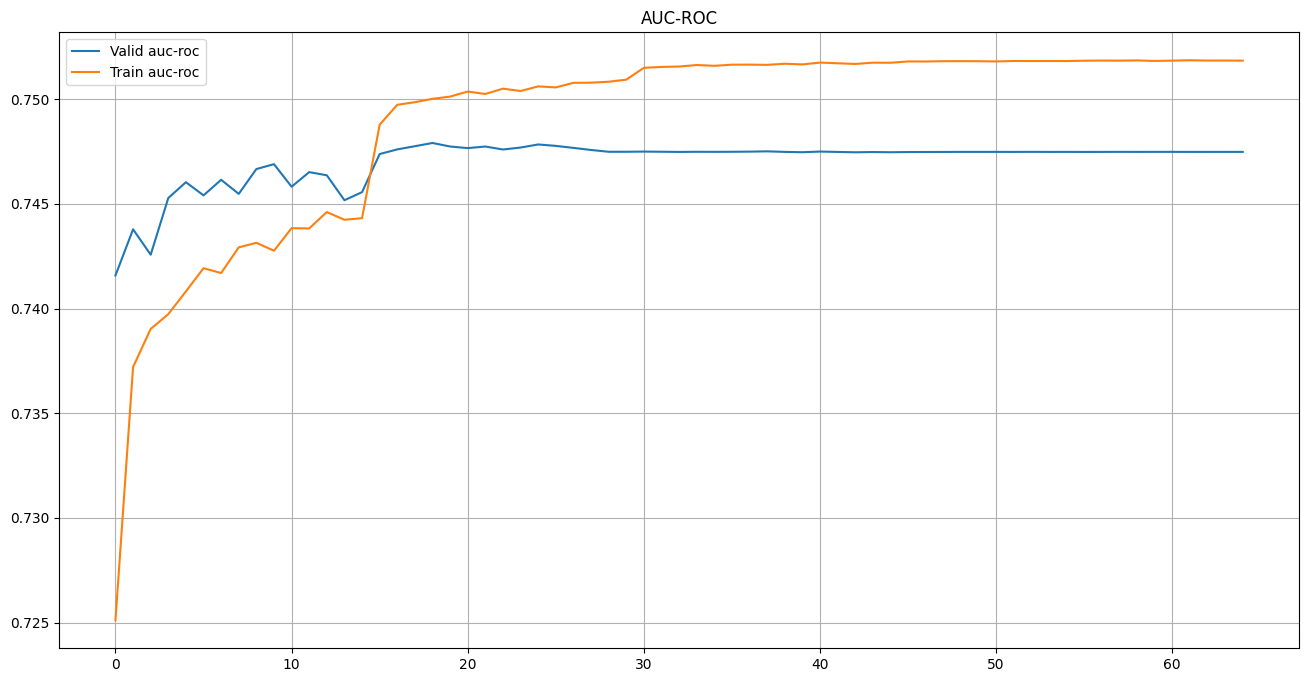

Total training and evaluation time 632.42340


In [27]:
num_epochs = 65

train_loss_history, valid_loss_history = [], []
train_auc_history, valid_auc_history = [], []
start = perf_counter()

for epoch in range(num_epochs):
    train_loss, train_auc = train_model(net)
    valid_loss, valid_auc = evaluate_model(net, test_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    train_auc_history.append(train_auc)
    valid_auc_history.append(valid_auc)
    
    clear_output()
    plot_stats(train_loss_history, valid_loss_history, train_auc_history, valid_auc_history)
    
    scheduler.step()
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')